In [1]:
import pandas as pd
import gc #garbage collector

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)
df_mor = pd.read_csv('../data/mortes-por-semana-ponderado.csv')

#Quantidade de estados
aux = df['RegionName'].value_counts().to_frame()

print('Quantidade de Regions:' + str(len(aux)))
print(aux.index.to_list())

Quantidade de Regions:27
['Para', 'Paraiba', 'Sao Paulo', 'Sergipe', 'Santa Catarina', 'Rio Grande do Sul', 'Roraima', 'Rondonia', 'Rio Grande do Norte', 'Rio de Janeiro', 'Parana', 'Piaui', 'Pernambuco', 'Acre', 'Alagoas', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Maranhao', 'Goias', 'Espirito Santo', 'Ceara', 'Bahia', 'Amapa', 'Amazonas', 'Tocantins', 'Distrito Federal']


# Agrupar cidades no ano de 2021 e moda das medidas

In [2]:
df.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

In [3]:
#set index pro q quer organizar
df = df.set_index('CityName', 'Date')
df['NewDeaths'] = df['ConfirmedDeaths'] - df['ConfirmedDeaths'].shift(1)
df = df.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_21724\3540096581.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('CityName', 'Date')


In [4]:
#alguns dias tão com menos mortes que os anteriores, seta pra 0 esses erros
df.loc[df['NewDeaths'] < 0,'NewDeaths'] = 0

In [5]:
#Converte coluna Date de INT para DATETIME
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

#organizar por data/cidade p depois dar slice
df = df.sort_values(by=['Date', 'CityName'])

In [6]:
#CITY_TOTAL: Descreve o ambiente de resposta geral que se aplica aos residentes do município, incluindo políticas definidas pelo governo nacional e pelo governo estadual,
#onde tais valores forem mais rigorosos do que a ação no nível municipal.
df = df.loc[df['Jurisdiction'] == 'CITY_TOTAL']

In [7]:
#dropa coluna jurisdiction pq n vai usar mais
df = df.drop(columns=['Jurisdiction'])

In [8]:
#dropa as notas dos indicadores que não serão úteis nessa analise
df = df.drop(columns=['C1_Notes', 'C2_Notes', 'C3_Notes', 'C4_Notes','C5_Notes','C6_Notes','C7_Notes','C8_Notes','E1_Notes','E2_Notes','E3_Notes','E4_Notes', \
    'H1_Notes','H2_Notes','H3_Notes','H4_Notes','H5_Notes','H6_Notes','H7_Notes','H8_Notes','M1_Wildcard','M1_Notes','V1_Notes','V2_Notes','V3_Notes','V4_Notes'])

In [9]:
#Como os NaN nos indicadores são dados interessantes, da replace neles por -1 para identificá-los
indicadores = ['C1_School closing', 'C1_Flag','C2_Workplace closing', 'C2_Flag','C3_Cancel public events', 'C3_Flag', \
    'C4_Restrictions on gatherings', 'C4_Flag','C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',  \
    'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls',  'E1_Income support', \
    'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures',  'E4_International support', \
    'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy',  'H3_Contact tracing',  \
    'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',  'H6_Facial Coverings', \
    'H6_Flag',  'H7_Vaccination policy', 'H7_Flag', 'H8_Protection of elderly people', 'H8_Flag',   \
    'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',  'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination', \
    'StringencyIndex', 'StringencyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', \
    'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay']

#df[indicadores] = df[indicadores].fillna(-1)

In [10]:
#Separa o dataset em anos
anos = [part for _, part in df.groupby(pd.Grouper(key='Date',freq='Y'))]

anos[1].loc[anos[1]['CityName'] == 'Ananindeua']

CityName CountryName CountryCode RegionName RegionCode    CityCode  \
62762  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62763  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62764  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62765  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62766  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
...           ...         ...         ...        ...        ...         ...   
63122  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63123  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63124  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63125  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63126  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   

            Date  C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  \
62762 2021-01-01                2.0      1.0                   2.0      1.0   
62763 2021-01-02                2.0      1.0                   2.0      1.0   
62764 2021-01-03                2.0      1.0                   2.0      1.0   
62765 2021-01-04                2.0      1.0                   2.0      1.0   
62766 2021-01-05                2.0      1.0                   2.0      1.0   
...          ...                ...      ...                   ...      ...   
63122 2021-12-27                1.0      1.0                   2.0      1.0   
63123 2021-12-28                1.0      1.0                   2.0      1.0   
63124 2021-12-29                1.0      1.0                   2.0      1.0   
63125 2021-12-30                1.0      1.0                   2.0      1.0   
63126 2021-12-31                1.0      1.0                   2.0      1.0   

       C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
62762                      2.0      1.0                            2.0   
62763                      2.0      1.0                            2.0   
62764                      2.0      1.0                            2.0   
62765                      2.0      1.0                            2.0   
62766                      2.0      1.0                            2.0   
...                        ...      ...                            ...   
63122                      2.0      1.0                            2.0   
63123                      2.0      1.0                            2.0   
63124                      2.0      1.0                            2.0   
63125                      2.0      1.0                            2.0   
63126                      2.0      1.0                            2.0   

       C4_Flag  C5_Close public transport  C5_Flag  \
62762      1.0                        1.0      1.0   
62763      1.0                        1.0      1.0   
62764      1.0                        1.0      1.0   
62765      1.0                        1.0      1.0   
62766      1.0                        1.0      1.0   
...        ...                        ...      ...   
63122      1.0                        0.0      NaN   
63123      1.0                        0.0      NaN   
63124      1.0                        0.0      NaN   
63125      1.0                        0.0      NaN   
63126      1.0                        0.0      NaN   

       C6_Stay at home requirements  C6_Flag  \
62762                           1.0      1.0   
62763                           1.0      1.0   
62764                           1.0      1.0   
62765                           1.0      1.0   
62766                           1.0      1.0   
...                             ...      ...   
63122                           1.0      1.0   
63123                           1.0      1.0   
63124                           1.0      1.0   
63125                           1.0      1.0   
63126                           1.0      1.0 

In [11]:
df_pol_ano = []

for ano in anos:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = ano.groupby(['CityName'])[indicadores].agg(lambda x: pd.Series.mean(x)).reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = ano['Date'].dt.to_period('Y').reset_index()['Date']
    #dados['Date'] = str(ano['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    #dados['Date'] = pd.to_datetime(dados['Date'])

    df_pol_ano.append(dados)

df_pol_ano = pd.concat(df_pol_ano)

#Reordena colunas
df_pol_ano = df_pol_ano[['CityName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing','C2_Flag', 'C3_Cancel public events', 'C3_Flag',\
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport','C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',\
       'C7_Restrictions on internal movement', 'C7_Flag','C8_International travel controls', 'E1_Income support', 'E1_Flag',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns',\
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing','H4_Emergency investment in healthcare', 'H5_Investment in vaccines',\
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag','H8_Protection of elderly people', 'H8_Flag',\
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability','V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'StringencyIndexForDisplay','GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',\
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay','EconomicSupportIndex', 'EconomicSupportIndexForDisplay']]

df_pol_ano

CityName  Date  C1_School closing  C1_Flag  \
0             Ananindeua  2020           1.986339      1.0   
1   Aparecida de Goiania  2020           2.254098      1.0   
2                Aracaju  2020           2.224044      1.0   
3              Araguaina  2020           2.038251      1.0   
4              Arapiraca  2020           2.177596      1.0   
..                   ...   ...                ...      ...   
49             Sao Paulo  2022           1.000000      1.0   
50              Teresina  2022           1.433333      1.0   
51            Uberlandia  2022           1.250000      1.0   
52            Vila Velha  2022           1.933333      1.0   
53               Vitoria  2022           1.933333      1.0   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0               1.639344      1.0                 1.598361      1.0   
1               1.931694      1.0                 1.538251      1.0   
2               1.509589      1.0                 1.315068      1.0   
3               1.371585      1.0                 1.598361      1.0   
4               1.896175      1.0                 1.426230      1.0   
..                   ...      ...                      ...      ...   
49              1.000000      1.0                 2.000000      1.0   
50              0.516667      1.0                 1.483333      1.0   
51              1.000000      1.0                 1.566667      1.0   
52              1.633333      1.0                 1.633333      1.0   
53              1.666667      1.0                 1.683333      1.0   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                        2.595628      1.0                   0.795082   
1                        2.740437      1.0                   0.784153   
2                        2.753425      1.0                   0.784153   
3                        2.756831      1.0                   0.562842   
4                        2.316940      1.0                   0.655738   
..                            ...      ...                        ...   
49                       1.766667      1.0                   1.000000   
50                       1.566667      1.0                   0.000000   
51                       0.816667      1.0                   0.000000   
52                       3.266667      1.0                   0.066667   
53                       3.266667      1.0                   0.066667   

    C5_Flag  C6_Stay at home requirements  C6_Flag  \
0       1.0                      0.893443      1.0   
1       1.0                      0.792350      1.0   
2       1.0                      0.795082      1.0   
3       1.0                      0.778689      1.0   
4       1.0                      0.792350      1.0   
..      ...                           ...      ...   
49      1.0                      0.000000      NaN   
50      NaN                      0.000000      NaN   
51      NaN                      0.000000      NaN   
52      1.0                      1.000000      1.0   
53      1.0                      1.000000      1.0   

    C7_Restrictions on internal movement  C7_Flag  \
0                               0.855191      1.0   
1                               0.576503      1.0   
2                               0.653005      1.0   
3                               0.896175      1.0   
4                               0.939891      1.0   
..                                   ...      ...   
49                              0.000000      NaN   
50                              0.000000      NaN   
51                              0.000000      NaN   
52                              0.000000      NaN   
53                              0.000000      NaN   

    C8_International travel controls  E1_Income support   E1_Flag  \
0                           2.038251           0.745902  0.992674   
1                           1.882514           0.745902  0.992674   
2                           2.734973           1

In [12]:
df_pol_ano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 53
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype        
---  ------                                 --------------  -----        
 0   CityName                               162 non-null    object       
 1   Date                                   162 non-null    period[A-DEC]
 2   C1_School closing                      156 non-null    float64      
 3   C1_Flag                                156 non-null    float64      
 4   C2_Workplace closing                   156 non-null    float64      
 5   C2_Flag                                153 non-null    float64      
 6   C3_Cancel public events                156 non-null    float64      
 7   C3_Flag                                150 non-null    float64      
 8   C4_Restrictions on gatherings          156 non-null    float64      
 9   C4_Flag                                141 non-null    float64      
 10  C5_

In [13]:
df_pol_ano.loc[df_pol_ano['Date'] == '2020']

CityName  Date  C1_School closing  C1_Flag  \
0             Ananindeua  2020           1.986339      1.0   
1   Aparecida de Goiania  2020           2.254098      1.0   
2                Aracaju  2020           2.224044      1.0   
3              Araguaina  2020           2.038251      1.0   
4              Arapiraca  2020           2.177596      1.0   
..                   ...   ...                ...      ...   
49             Sao Paulo  2020           2.065574      1.0   
50              Teresina  2020           2.071038      1.0   
51            Uberlandia  2020           2.368852      1.0   
52            Vila Velha  2020           2.062842      1.0   
53               Vitoria  2020           2.054645      1.0   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0               1.639344      1.0                 1.598361      1.0   
1               1.931694      1.0                 1.538251      1.0   
2               1.509589      1.0                 1.315068      1.0   
3               1.371585      1.0                 1.598361      1.0   
4               1.896175      1.0                 1.426230      1.0   
..                   ...      ...                      ...      ...   
49              1.759563      1.0                 1.366120      1.0   
50              1.284153      1.0                 1.284153      1.0   
51              1.344262      1.0                 1.125683      1.0   
52              1.945355      1.0                 1.595628      1.0   
53              1.950820      1.0                 1.486339      1.0   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                        2.595628      1.0                   0.795082   
1                        2.740437      1.0                   0.784153   
2                        2.753425      1.0                   0.784153   
3                        2.756831      1.0                   0.562842   
4                        2.316940      1.0                   0.655738   
..                            ...      ...                        ...   
49                       2.355191      1.0                   0.751366   
50                       1.535519      1.0                   1.188525   
51                       2.000000      1.0                   0.786885   
52                       2.715847      1.0                   0.000000   
53                       2.551913      1.0                   0.000000   

    C5_Flag  C6_Stay at home requirements  C6_Flag  \
0   1.00000                      0.893443      1.0   
1   1.00000                      0.792350      1.0   
2   1.00000                      0.795082      1.0   
3   1.00000                      0.778689      1.0   
4   1.00000                      0.792350      1.0   
..      ...                           ...      ...   
49  1.00000                      0.784153      1.0   
50  0.53169                      0.775956      1.0   
51  1.00000                      0.784153      1.0   
52      NaN                      1.166667      1.0   
53      NaN                      0.781421      1.0   

    C7_Restrictions on internal movement  C7_Flag  \
0                               0.855191      1.0   
1                               0.576503      1.0   
2                               0.653005      1.0   
3                               0.896175      1.0   
4                               0.939891      1.0   
..                                   ...      ...   
49                              0.519126      1.0   
50                              0.844262      1.0   
51                              1.573770      1.0   
52                              0.494536      1.0   
53                              0.494536      1.0   

    C8_International travel controls  E1_Income support   E1_Flag  \
0                           2.038251           0.745902  0.992674   
1                           1.882514           0.745902  0.992674   
2                           2.734973           1

# agrupar cidades por semana e moda das medidas

In [14]:
df.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

In [15]:
#set index pro q quer organizar
df = df.set_index('CityName', 'Date')
df['NewDeaths'] = df['ConfirmedDeaths'] - df['ConfirmedDeaths'].shift(1)
df = df.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_21724\3540096581.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('CityName', 'Date')


In [16]:
#alguns dias tão com menos mortes que os anteriores, seta pra 0 esses erros
df.loc[df['NewDeaths'] < 0,'NewDeaths'] = 0

In [17]:
#Converte coluna Date de INT para DATETIME
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

#organizar por data/cidade p depois dar slice
df = df.sort_values(by=['Date', 'CityName'])

In [18]:
#CITY_TOTAL: Descreve o ambiente de resposta geral que se aplica aos residentes do município, incluindo políticas definidas pelo governo nacional e pelo governo estadual,
#onde tais valores forem mais rigorosos do que a ação no nível municipal.
#df = df.loc[df['Jurisdiction'] == 'CITY_TOTAL']

In [19]:
#dropa coluna jurisdiction pq n vai usar mais
#df = df.drop(columns=['Jurisdiction'])

In [20]:
#dropa as notas dos indicadores que não serão úteis nessa analise
#df = df.drop(columns=['C1_Notes', 'C2_Notes', 'C3_Notes', 'C4_Notes','C5_Notes','C6_Notes','C7_Notes','C8_Notes','E1_Notes','E2_Notes','E3_Notes','E4_Notes', \
#    'H1_Notes','H2_Notes','H3_Notes','H4_Notes','H5_Notes','H6_Notes','H7_Notes','H8_Notes','M1_Wildcard','M1_Notes','V1_Notes','V2_Notes','V3_Notes','V4_Notes'])

In [21]:
#Como os NaN nos indicadores são dados interessantes, da replace neles por -1 para identificá-los
indicadores = ['C1_School closing', 'C1_Flag','C2_Workplace closing', 'C2_Flag','C3_Cancel public events', 'C3_Flag', \
    'C4_Restrictions on gatherings', 'C4_Flag','C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',  \
    'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls',  'E1_Income support', \
    'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures',  'E4_International support', \
    'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy',  'H3_Contact tracing',  \
    'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',  'H6_Facial Coverings', \
    'H6_Flag',  'H7_Vaccination policy', 'H7_Flag', 'H8_Protection of elderly people', 'H8_Flag',   \
    'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',  'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination', \
    'StringencyIndex', 'StringencyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', \
    'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay']

#df[indicadores] = df[indicadores].fillna(-1)

In [22]:
df.head()

CityName CountryName CountryCode RegionName RegionCode  \
0            Ananindeua      Brazil         BRA       Para      BR_PA   
1  Aparecida de Goiania      Brazil         BRA      Goias      BR_GO   
2               Aracaju      Brazil         BRA    Sergipe      BR_SE   
3             Araguaina      Brazil         BRA  Tocantins      BR_TO   
4             Arapiraca      Brazil         BRA    Alagoas      BR_AL   

     CityCode       Date  C1_School closing  C1_Flag  C2_Workplace closing  \
0  BR_1500800 2020-01-01                0.0      NaN                   0.0   
1  BR_5201405 2020-01-01                0.0      NaN                   0.0   
2  BR_2800308 2020-01-01                0.0      NaN                   0.0   
3  BR_1702109 2020-01-01                0.0      NaN                   0.0   
4  BR_2700300 2020-01-01                0.0      NaN                   0.0   

   C2_Flag  C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
0      NaN                      0.0      NaN                            0.0   
1      NaN                      0.0      NaN                            0.0   
2      NaN                      0.0      NaN                            0.0   
3      NaN                      0.0      NaN                            0.0   
4      NaN                      0.0      NaN                            0.0   

   C4_Flag  C5_Close public transport  C5_Flag  C6_Stay at home requirements  \
0      NaN                        0.0      NaN                           0.0   
1      NaN                        0.0      NaN                           0.0   
2      NaN                        0.0      NaN                           0.0   
3      NaN                        0.0      NaN                           0.0   
4      NaN                        0.0      NaN                           0.0   

   C6_Flag  C7_Restrictions on internal movement  C7_Flag  \
0      NaN                                   0.0      NaN   
1      NaN                                   0.0      NaN   
2      NaN                                   0.0      NaN   
3      NaN                                   0.0      NaN   
4      NaN                                   0.0      NaN   

   C8_International travel controls  E1_Income support  E1_Flag  \
0                               0.0                0.0      NaN   
1                               0.0                0.0      NaN   
2                               0.0                0.0      NaN   
3                               0.0                0.0      NaN   
4                               0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 NaN                       NaN   
1                      0.0                 NaN                       NaN   
2                      0.0                 NaN                       NaN   
3                      0.0                 NaN                       NaN   
4                      NaN                 NaN                       NaN   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    NaN   
1                 0.0                                    NaN   
2                 0.0                                    NaN   
3                 0.0                                    NaN   
4                 0.0                                    NaN   

   H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
0                        NaN                  0.0      NaN   
1                 

In [23]:
#Separa o dataset em semanas
semanas = [part for _, part in df.groupby(pd.Grouper(key='Date',freq='W'))]

semanas[16].loc[semanas[16]['CityName'] == 'Ananindeua']

CityName CountryName CountryCode RegionName RegionCode    CityCode  \
5940  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
5994  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6048  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6102  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6156  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6210  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6264  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   

           Date  C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  \
5940 2020-04-20                3.0      1.0                   2.0      1.0   
5994 2020-04-21                3.0      1.0                   2.0      1.0   
6048 2020-04-22                3.0      1.0                   2.0      1.0   
6102 2020-04-23                3.0      1.0                   2.0      1.0   
6156 2020-04-24                3.0      1.0                   2.0      1.0   
6210 2020-04-25                3.0      1.0                   2.0      1.0   
6264 2020-04-26                3.0      1.0                   2.0      1.0   

      C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
5940                      2.0      1.0                            4.0   
5994                      2.0      1.0                            4.0   
6048                      2.0      1.0                            4.0   
6102                      2.0      1.0                            4.0   
6156                      2.0      1.0                            4.0   
6210                      2.0      1.0                            4.0   
6264                      2.0      1.0                            4.0   

      C4_Flag  C5_Close public transport  C5_Flag  \
5940      1.0                        1.0      1.0   
5994      1.0                        1.0      1.0   
6048      1.0                        1.0      1.0   
6102      1.0                        1.0      1.0   
6156      1.0                        1.0      1.0   
6210      1.0                        1.0      1.0   
6264      1.0                        1.0      1.0   

      C6_Stay at home requirements  C6_Flag  \
5940                           1.0      1.0   
5994                           1.0      1.0   
6048                           1.0      1.0   
6102                           1.0      1.0   
6156                           1.0      1.0   
6210                           1.0      1.0   
6264                           1.0      1.0   

      C7_Restrictions on internal movement  C7_Flag  \
5940                                   2.0      1.0   
5994                                   2.0      1.0   
6048                                   2.0      1.0   
6102                                   2.0      1.0   
6156                                   2.0      1.0   
6210                                   2.0      1.0   
6264                                   2.0      1.0   

      C8_International travel controls  E1_Income support  E1_Flag  \
5940                               4.0                1.0      1.0   
5994                               4.0                1.0      1.0   
6048                               4.0                1.0      1.0   
6102                               4.0                1.0      1.0   
6156                               4.0                1.0      1.0   
6210                               4.0                1.0      1.0   
6264                               4.0                1.0      1.0   

      E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
5940                      1.0                 NaN                       NaN   
5994                      1.0                 NaN                       NaN   
6048                      1.0                 NaN                       NaN   
6102                      1.0                 NaN    

In [24]:
semanas[0].columns

Index(['CityName', 'CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'CityCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag',
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',
       'V3_Vaccine Financial Support', 'V4_Mandatory 

In [25]:
df_pol_semana = []

for sem in semanas:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = sem.groupby(['CityName'])[indicadores].agg(lambda x: pd.Series.mean(x)).reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = str(sem['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    dados['Date'] = pd.to_datetime(dados['Date'])

    df_pol_semana.append(dados)

df_pol_semana = pd.concat(df_pol_semana)

#Reordena colunas
df_pol_semana = df_pol_semana[['CityName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing','C2_Flag', 'C3_Cancel public events', 'C3_Flag',\
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport','C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',\
       'C7_Restrictions on internal movement', 'C7_Flag','C8_International travel controls', 'E1_Income support', 'E1_Flag',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns',\
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing','H4_Emergency investment in healthcare', 'H5_Investment in vaccines',\
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag','H8_Protection of elderly people', 'H8_Flag',\
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability','V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'StringencyIndexForDisplay','GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',\
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay','EconomicSupportIndex', 'EconomicSupportIndexForDisplay']]

df_pol_semana

CityName       Date  C1_School closing  C1_Flag  \
0             Ananindeua 2020-01-05                0.0      NaN   
1   Aparecida de Goiania 2020-01-05                0.0      NaN   
2                Aracaju 2020-01-05                0.0      NaN   
3              Araguaina 2020-01-05                0.0      NaN   
4              Arapiraca 2020-01-05                0.0      NaN   
..                   ...        ...                ...      ...   
49             Sao Paulo 2022-04-03                NaN      NaN   
50              Teresina 2022-04-03                NaN      NaN   
51            Uberlandia 2022-04-03                NaN      NaN   
52            Vila Velha 2022-04-03                NaN      NaN   
53               Vitoria 2022-04-03                NaN      NaN   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                    0.0      NaN                      0.0      NaN   
1                    0.0      NaN                      0.0      NaN   
2                    0.0      NaN                      0.0      NaN   
3                    0.0      NaN                      0.0      NaN   
4                    0.0      NaN                      0.0      NaN   
..                   ...      ...                      ...      ...   
49                   NaN      NaN                      NaN      NaN   
50                   NaN      NaN                      NaN      NaN   
51                   NaN      NaN                      NaN      NaN   
52                   NaN      NaN                      NaN      NaN   
53                   NaN      NaN                      NaN      NaN   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                             0.0      NaN                        0.0   
1                             0.0      NaN                        0.0   
2                             0.0      NaN                        0.0   
3                             0.0      NaN                        0.0   
4                             0.0      NaN                        0.0   
..                            ...      ...                        ...   
49                            NaN      NaN                        NaN   
50                            NaN      NaN                        NaN   
51                            NaN      NaN                        NaN   
52                            NaN      NaN                        NaN   
53                            NaN      NaN                        NaN   

    C5_Flag  C6_Stay at home requirements  C6_Flag  \
0       NaN                           0.0      NaN   
1       NaN                           0.0      NaN   
2       NaN                           0.0      NaN   
3       NaN                           0.0      NaN   
4       NaN                           0.0      NaN   
..      ...                           ...      ...   
49      NaN                           NaN      NaN   
50      NaN                           NaN      NaN   
51      NaN                           NaN      NaN   
52      NaN                           NaN      NaN   
53      NaN                           NaN      NaN   

    C7_Restrictions on internal movement  C7_Flag  \
0                                    0.0      NaN   
1                                    0.0      NaN   
2                                    0.0      NaN   
3                                    0.0      NaN   
4                                    0.0      NaN   
..                                   ...      ...   
49                                   NaN      NaN   
50                                   NaN      NaN   
51                                   NaN      NaN   
52                                   NaN      NaN   
53                                   NaN      NaN   

    C8_International travel controls  E1_Income support  E1_Flag  \
0                                0.0                0.0      NaN   
1                                0.0                0.0    

## Trabalho com a mortes por semana

In [26]:
df_mor = df_mor.drop(labels=['Unnamed: 0'], axis=1)

In [27]:
#Converte coluna Date de INT para DATETIME
df_mor['Date'] = pd.to_datetime(df_mor['Date'])

In [28]:
df_mor

CityName    CityCode       Date      CodMun    NomeDoEstado  \
0               Ananindeua  BR_1500800 2020-01-05  BR_1500800            Pará   
1     Aparecida de Goiania  BR_5201405 2020-01-05  BR_5201405           Goiás   
2                  Aracaju  BR_2800308 2020-01-05  BR_2800308         Sergipe   
3                Araguaina  BR_1702109 2020-01-05  BR_1702109       Tocantins   
4                Arapiraca  BR_2700300 2020-01-05  BR_2700300         Alagoas   
...                    ...         ...        ...         ...             ...   
6367             Sao Paulo  BR_3550308 2022-03-31  BR_3550308       São Paulo   
6368              Teresina  BR_2211001 2022-03-31  BR_2211001           Piauí   
6369            Uberlandia  BR_3170206 2022-03-31  BR_3170206    Minas Gerais   
6370            Vila Velha  BR_3205200 2022-03-31  BR_3205200  Espírito Santo   
6371               Vitoria  BR_3205309 2022-03-31  BR_3205309  Espírito Santo   

      CodEst        Regiao  De 0 a 4 anos  De 5 a 14 anos  De 15 a 24 anos  \
0         15         Norte          33506           79182            95610   
1         52  Centro-Oeste          47599           91548           100838   
2         28      Nordeste          40201           91713           106552   
3         17         Norte          13440           30350            33805   
4         27      Nordeste          16253           36205            42658   
...      ...           ...            ...             ...              ...   
6367      35       Sudeste         785654         1566869          1793378   
6368      22      Nordeste          53927          123862           154908   
6369      31       Sudeste          41863           88569           107120   
6370      32       Sudeste          31620           64313            73626   
6371      32       Sudeste          21539           45321            50212   

      De 25 a 34 anos  De 35 a 44 anos  De 45 a 54 anos  De 55 a 64 anos  \
0               92045            88533            66756            44541   
1              105886            95674            70006            45310   
2              112219           114355            84249            60412   
3               33985            28627            19398            12176   
4               38445            34868            27021            18589   
...               ...              ...              ...              ...   
6367          1892654          2013405          1609018          1280655   
6368           144131           141131           104080            77746   
6369           114697           112710            90253            74153   
6370            80126            81156            63616            54523   
6371            57716            60919            44354            41257   

      De 65 a 74 anos  De 75 anos ou mais  TotalHabitantes  NewDeaths  \
0               24313               11061           535547        0.0   
1               22762               10523           590146        0.0   
2               35946               19261           664908        0.0   
3                7178                4422           183381        0.0   
4               11876                7132           233047        0.0   
...               ...                 ...              ...        ...   
6367           840831              542768         12325232        0.0   
6368            45126               23164           868075        0.0   
6369            44185               25547           699097        0.0   
6370            32584               19761           501325        0.0   
6371            27205               17332           365855        0.0   

      Weighted Rate De 0 a 4 anos  Weighted Rate De 5 a 14 anos  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                 

### transforma mor semana em ano

In [29]:
#organizar por data/cidade p depois dar slice
df_mor = df_mor.sort_values(by=['Date', 'CityName'])

In [30]:
cdd_regiao = df_mor[['CityName', 'Regiao']].drop_duplicates()
cdd_regiao.head()

CityName        Regiao
0            Ananindeua         Norte
1  Aparecida de Goiania  Centro-Oeste
2               Aracaju      Nordeste
3             Araguaina         Norte
4             Arapiraca      Nordeste

In [31]:
#Separa o dataset em anos
anos = [part for _, part in df_mor.groupby(pd.Grouper(key='Date',freq='Y'))]

anos[0].loc[anos[0]['CityName'] == 'Ananindeua'].head()

CityName    CityCode       Date      CodMun NomeDoEstado  CodEst  \
0    Ananindeua  BR_1500800 2020-01-05  BR_1500800         Pará      15   
54   Ananindeua  BR_1500800 2020-01-12  BR_1500800         Pará      15   
108  Ananindeua  BR_1500800 2020-01-19  BR_1500800         Pará      15   
162  Ananindeua  BR_1500800 2020-01-26  BR_1500800         Pará      15   
216  Ananindeua  BR_1500800 2020-02-02  BR_1500800         Pará      15   

    Regiao  De 0 a 4 anos  De 5 a 14 anos  De 15 a 24 anos  De 25 a 34 anos  \
0    Norte          33506           79182            95610            92045   
54   Norte          33506           79182            95610            92045   
108  Norte          33506           79182            95610            92045   
162  Norte          33506           79182            95610            92045   
216  Norte          33506           79182            95610            92045   

     De 35 a 44 anos  De 45 a 54 anos  De 55 a 64 anos  De 65 a 74 anos  \
0              88533            66756            44541            24313   
54             88533            66756            44541            24313   
108            88533            66756            44541            24313   
162            88533            66756            44541            24313   
216            88533            66756            44541            24313   

     De 75 anos ou mais  TotalHabitantes  NewDeaths  \
0                 11061           535547        0.0   
54                11061           535547        0.0   
108               11061           535547        0.0   
162               11061           535547        0.0   
216               11061           535547        0.0   

     Weighted Rate De 0 a 4 anos  Weighted Rate De 5 a 14 anos  \
0                            0.0                           0.0   
54                           0.0                           0.0   
108                          0.0                           0.0   
162                          0.0                           0.0   
216                          0.0                           0.0   

     Weighted Rate De 15 a 24 anos  Weighted Rate De 25 a 34 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 35 a 44 anos  Weighted Rate De 45 a 54 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 55 a 64 anos  Weighted Rate De 65 a 74 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 75 anos ou mais  Morte ponderada por 100 mil  \
0                                 0.0                          0.0   
54                                0.0                          0.0   
108                               0.0                          0.0   
162                               0.0                          0.0   
216                               0.0                          0.0   

     SemanaEpidemiologica  
0                       1  
54                      2  
108                     3  
162                     4  
216                     5

In [32]:
df_mor_ano = []

for ano in anos:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = ano.groupby(['CityName'])['Morte ponderada por 100 mil'].sum().reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = ano['Date'].dt.to_period('Y').reset_index()['Date']
    #dados['Date'] = str(ano['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    #dados['Date'] = pd.to_datetime(dados['Date'])

    df_mor_ano.append(dados)

df_mor_ano = pd.concat(df_mor_ano)

df_mor_ano = pd.merge(df_mor_ano, cdd_regiao, on='CityName').sort_values(by='Date').reset_index(drop=True)

df_mor_ano

CityName  Morte ponderada por 100 mil  Date        Regiao
0                 Ananindeua                    67.781844  2020         Norte
1                   Salvador                   109.364803  2020      Nordeste
2                  Ji-Parana                    70.765039  2020         Norte
3    Jaboatao dos Guararapes                   131.143379  2020      Nordeste
4                 Imperatriz                   156.554622  2020      Nordeste
..                       ...                          ...   ...           ...
157               Imperatriz                     0.000000  2022      Nordeste
158                Guarulhos                     0.000000  2022       Sudeste
159                  Goiania                     0.000000  2022  Centro-Oeste
160              Porto Velho                     0.000000  2022         Norte
161                  Vitoria                     0.000000  2022       Sudeste

[162 rows x 4 columns]

In [33]:
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2020']))
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2021']))
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2022']))

54
54
54


In [34]:
#Valor não ta batendo =/
#somatoria das mortes ponderadas por 100 mil ahb
total_mortes_cdd = df_mor_ano.groupby('CityName')['Morte ponderada por 100 mil'].sum()
total_mortes_cdd.sort_values()

CityName
Mossoro             135.721773
Ananindeua          150.875288
Belo Horizonte      161.369717
Feira de Santana    163.007655
Cruzeiro do Sul     179.631759
                       ...    
Campo Grande        419.608386
Manaus              428.103291
Goiania             432.333792
Rio de Janeiro      465.977719
Cuiaba              506.440304
Name: Morte ponderada por 100 mil, Length: 54, dtype: float64

# Trabalha com o conjunto de mortes e políticas

## ano

In [35]:
df_mor_ano.head()

CityName  Morte ponderada por 100 mil  Date    Regiao
0               Ananindeua                    67.781844  2020     Norte
1                 Salvador                   109.364803  2020  Nordeste
2                Ji-Parana                    70.765039  2020     Norte
3  Jaboatao dos Guararapes                   131.143379  2020  Nordeste
4               Imperatriz                   156.554622  2020  Nordeste

In [36]:
df_pol_ano.head()

CityName  Date  C1_School closing  C1_Flag  \
0            Ananindeua  2020           1.986339      1.0   
1  Aparecida de Goiania  2020           2.254098      1.0   
2               Aracaju  2020           2.224044      1.0   
3             Araguaina  2020           2.038251      1.0   
4             Arapiraca  2020           2.177596      1.0   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0              1.639344      1.0                 1.598361      1.0   
1              1.931694      1.0                 1.538251      1.0   
2              1.509589      1.0                 1.315068      1.0   
3              1.371585      1.0                 1.598361      1.0   
4              1.896175      1.0                 1.426230      1.0   

   C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  C5_Flag  \
0                       2.595628      1.0                   0.795082      1.0   
1                       2.740437      1.0                   0.784153      1.0   
2                       2.753425      1.0                   0.784153      1.0   
3                       2.756831      1.0                   0.562842      1.0   
4                       2.316940      1.0                   0.655738      1.0   

   C6_Stay at home requirements  C6_Flag  \
0                      0.893443      1.0   
1                      0.792350      1.0   
2                      0.795082      1.0   
3                      0.778689      1.0   
4                      0.792350      1.0   

   C7_Restrictions on internal movement  C7_Flag  \
0                              0.855191      1.0   
1                              0.576503      1.0   
2                              0.653005      1.0   
3                              0.896175      1.0   
4                              0.939891      1.0   

   C8_International travel controls  E1_Income support   E1_Flag  \
0                          2.038251           0.745902  0.992674   
1                          1.882514           0.745902  0.992674   
2                          2.734973           1.502732  1.000000   
3                          1.882514           0.745902  0.992674   
4                          2.308743           0.745902  0.992674   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                 0.795082                 NaN                       NaN   
1                 0.792350                 NaN                       NaN   
2                 0.792350                 NaN                       NaN   
3                 0.792350                 NaN                       NaN   
4                 1.000000                 NaN                       NaN   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                         1.863388      1.0           1.311475   
1                         1.863388      1.0           1.387978   
2                         1.863388      1.0           1.825137   
3                         1.863388      1.0           1.439891   
4                         1.863388      1.0           1.500000   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0            1.502732                                    NaN   
1            1.502732                                    NaN   
2            1.502732                                    NaN   
3            1.554645                                    NaN   
4            1.595628                                    NaN   

   H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
0                        NaN             2.775956      1.0   
1                        NaN             2.797814      1.0   
2                        NaN             2.721311      1.0   
3                        NaN             2.770492      1.0   
4                        NaN             2.493421      1.0   

   H7_Vaccination policy  H7_Flag  H8_Protection of elderly people  H8_Flag  \
0                    0.0      NaN                         0.65

In [37]:
df_tot_ano = pd.merge(df_pol_ano, df_mor_ano, on=['CityName', 'Date'])
print(len(df_pol_ano))
print(len(df_mor_ano))
print(len(df_tot_ano))

162
162
162


In [38]:
df_tot_ano.loc[df_tot_ano['Date'] == '2021'].head()

CityName  Date  C1_School closing   C1_Flag  \
54            Ananindeua  2021           1.572603  1.000000   
55  Aparecida de Goiania  2021           1.601648  1.000000   
56               Aracaju  2021           1.865753  0.854795   
57             Araguaina  2021           1.641096  1.000000   
58             Arapiraca  2021           1.621918  1.000000   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
54              1.668493      1.0                 1.783562      1.0   
55              1.649315      1.0                 1.586301      1.0   
56              1.383562      1.0                 1.827397      1.0   
57              1.838356      1.0                 2.000000      1.0   
58              1.482192      1.0                 1.194521      1.0   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
54                       2.484932      1.0                   0.035616   
55                       1.145205      1.0                   0.991781   
56                       2.282192      1.0                   0.783562   
57                       3.260274      1.0                   0.271233   
58                       2.057534      1.0                   0.663014   

    C5_Flag  C6_Stay at home requirements   C6_Flag  \
54      1.0                      1.145205  0.966006   
55      1.0                      1.326027  1.000000   
56      1.0                      1.038356  1.000000   
57      1.0                      1.098630  1.000000   
58      1.0                      0.901370  1.000000   

    C7_Restrictions on internal movement   C7_Flag  \
54                              0.389041  1.000000   
55                              0.000000       NaN   
56                              0.147945  1.000000   
57                              0.926027  0.940828   
58                              1.090411  0.652542   

    C8_International travel controls  E1_Income support   E1_Flag  \
54                          0.934247           0.684932  0.000000   
55                          0.934247           0.791781  0.000000   
56                          1.454795           1.438356  0.257534   
57                          0.934247           0.791781  0.000000   
58                          0.945205           0.676712  0.000000   

    E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
54                      1.0                 NaN                       NaN   
55                      1.0                 NaN                       NaN   
56                      1.0                 NaN                       NaN   
57                      1.0                 NaN                       NaN   
58                      1.0                 NaN                       NaN   

    H1_Public information campaigns  H1_Flag  H2_Testing policy  \
54                              2.0      1.0           2.295890   
55                              2.0      1.0           2.000000   
56                              2.0      1.0           2.375342   
57                              2.0      1.0           2.073973   
58                              2.0      1.0           2.000000   

    H3_Contact tracing  H4_Emergency investment in healthcare  \
54                 2.0                                    NaN   
55                 2.0                                    NaN   
56                 2.0                                    NaN   
57                 2.0                                    NaN   
58                 2.0                                    NaN   

    H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
54                        NaN                  4.0      1.0   
55                        NaN                  4.0      1.0   
56                        NaN                  4.0      1.0   
57                        NaN                  4.0      1.0   
58                        NaN                  4.0      1.0   

    H7_Vaccination policy  H7_Flag  H8_Protection of elderly peo

Text(0.5, 1.0, 'Relação de Mortes Ponderadas e Índice de Rigor no ano de 2020 p/ cada cidade')

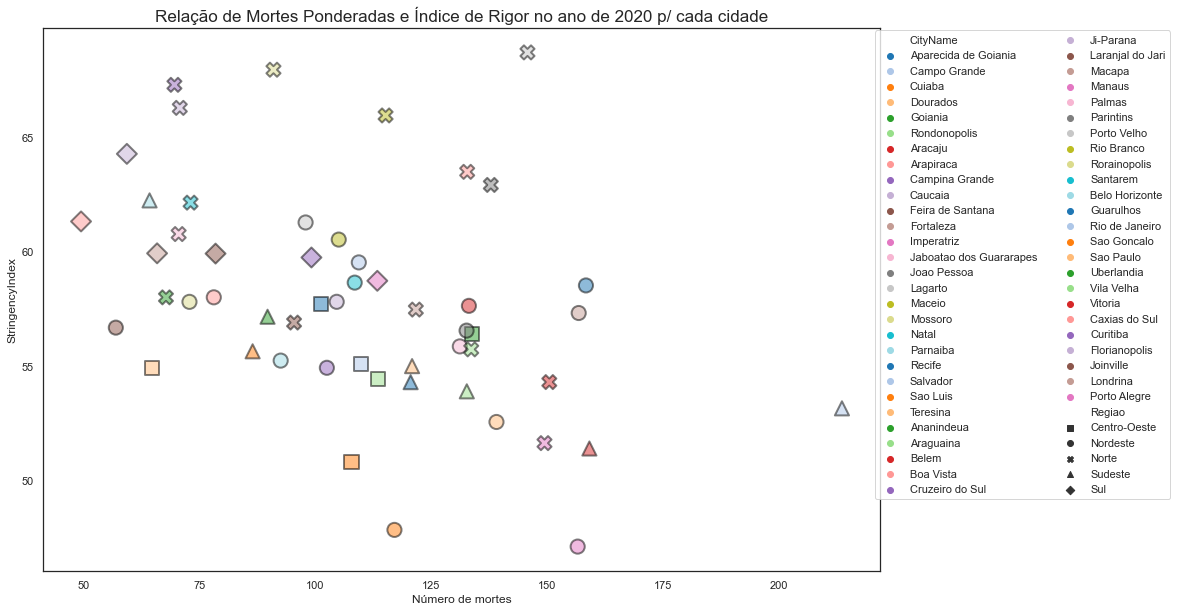

In [53]:
import seaborn as sns

temp = df_tot_ano.loc[df_tot_ano['Date'] == '2020']
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao', 'CityName'])

sns.set(rc={"figure.figsize":(15, 10)})
sns.set_theme(style="white")

p = sns.scatterplot(data=temp, \
    x='Morte ponderada por 100 mil', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=200, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

#p.set_yticks(range(0,54,1))
#p.set_xticks(range(1,119,1))
p.legend(loc='upper center', bbox_to_anchor=(1.17, 1.005), ncol=2)
p.set_ylabel('StringencyIndex')
p.set_xlabel('Número de mortes')
p.set_facecolor('white')
p.set_title('Relação de Mortes Ponderadas e Índice de Rigor no ano de 2020 p/ cada cidade', fontsize=17)

Text(0.5, 1.0, 'Relação de Mortes Ponderadas e Índice de Rigor no ano de 2021 p/ cada cidade')

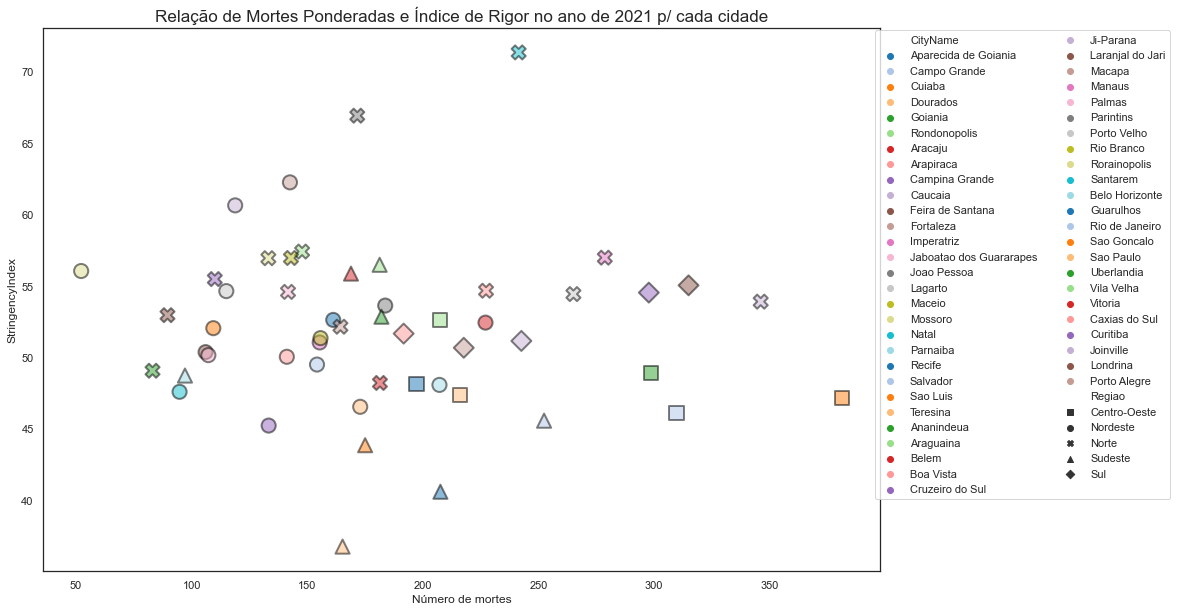

In [40]:
#Ta sem 3 cidades pq estão com indicadores nulos
temp = df_tot_ano.loc[df_tot_ano['Date'] == '2021']
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao', 'CityName'])

sns.set(rc={"figure.figsize":(15, 10)})
sns.set_theme(style="white")

p = sns.scatterplot(data=temp, \
    x='Morte ponderada por 100 mil', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=200, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

#p.set_yticks(range(0,54,1))
#p.set_xticks(range(1,119,1))
p.legend(loc='upper center', bbox_to_anchor=(1.17, 1.005), ncol=2)
p.set_ylabel('StringencyIndex')
p.set_xlabel('Número de mortes')
p.set_facecolor('white')
p.set_title('Relação de Mortes Ponderadas e Índice de Rigor no ano de 2021 p/ cada cidade', fontsize=17)

## semana

In [41]:
df_tot_sem = pd.merge(df_pol_semana, df_mor, on=['CityName', 'Date'])
df_tot_sem

CityName       Date  C1_School closing  C1_Flag  \
0               Ananindeua 2020-01-05                0.0      NaN   
1     Aparecida de Goiania 2020-01-05                0.0      NaN   
2                  Aracaju 2020-01-05                0.0      NaN   
3                Araguaina 2020-01-05                0.0      NaN   
4                Arapiraca 2020-01-05                0.0      NaN   
...                    ...        ...                ...      ...   
6313             Sao Paulo 2022-03-27                NaN      NaN   
6314              Teresina 2022-03-27                NaN      NaN   
6315            Uberlandia 2022-03-27                NaN      NaN   
6316            Vila Velha 2022-03-27                NaN      NaN   
6317               Vitoria 2022-03-27                NaN      NaN   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                      0.0      NaN                      0.0      NaN   
1                      0.0      NaN                      0.0      NaN   
2                      0.0      NaN                      0.0      NaN   
3                      0.0      NaN                      0.0      NaN   
4                      0.0      NaN                      0.0      NaN   
...                    ...      ...                      ...      ...   
6313                   NaN      NaN                      NaN      NaN   
6314                   NaN      NaN                      NaN      NaN   
6315                   NaN      NaN                      NaN      NaN   
6316                   NaN      NaN                      NaN      NaN   
6317                   NaN      NaN                      NaN      NaN   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                               0.0      NaN                        0.0   
1                               0.0      NaN                        0.0   
2                               0.0      NaN                        0.0   
3                               0.0      NaN                        0.0   
4                               0.0      NaN                        0.0   
...                             ...      ...                        ...   
6313                            NaN      NaN                        NaN   
6314                            NaN      NaN                        NaN   
6315                            NaN      NaN                        NaN   
6316                            NaN      NaN                        NaN   
6317                            NaN      NaN                        NaN   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
0         NaN                           0.0      NaN   
1         NaN                           0.0      NaN   
2         NaN                           0.0      NaN   
3         NaN                           0.0      NaN   
4         NaN                           0.0      NaN   
...       ...                           ...      ...   
6313      NaN                           NaN      NaN   
6314      NaN                           NaN      NaN   
6315      NaN                           NaN      NaN   
6316      NaN                           NaN      NaN   
6317      NaN                           NaN      NaN   

      C7_Restrictions on internal movement  C7_Flag  \
0                                      0.0      NaN   
1                                      0.0      NaN   
2                                      0.0      NaN   
3                                      0.0      NaN   
4                                      0.0      NaN   
...                                    ...      ...   
6313                                   NaN      NaN   
6314                                   NaN      NaN   
6315                                   NaN      NaN   
6316                                   NaN      NaN   
6317                                   NaN      NaN   

      C8_International travel controls  E1_Income support  E1_Flag  \
0      

In [42]:
df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021]
#df_tot_sem.loc[df_tot_sem['CityName'] == 'Cuiaba']['Regiao']

CityName       Date  C1_School closing  C1_Flag  \
2808            Ananindeua 2021-01-03                2.0      1.0   
2809  Aparecida de Goiania 2021-01-03                2.0      1.0   
2810               Aracaju 2021-01-03                2.0      1.0   
2811             Araguaina 2021-01-03                2.0      1.0   
2812             Arapiraca 2021-01-03                2.0      1.0   
...                    ...        ...                ...      ...   
5611             Sao Paulo 2021-12-26                1.0      1.0   
5612              Teresina 2021-12-26                1.0      1.0   
5613            Uberlandia 2021-12-26                1.0      1.0   
5614            Vila Velha 2021-12-26                1.0      1.0   
5615               Vitoria 2021-12-26                1.0      1.0   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
2808                   2.0      1.0                      2.0      1.0   
2809                   2.0      1.0                      1.0      1.0   
2810                   1.0      1.0                      1.0      1.0   
2811                   1.0      1.0                      2.0      1.0   
2812                   2.0      1.0                      1.0      1.0   
...                    ...      ...                      ...      ...   
5611                   1.0      1.0                      2.0      1.0   
5612                   1.0      1.0                      1.0      1.0   
5613                   1.0      1.0                      1.0      1.0   
5614                   1.0      1.0                      1.0      1.0   
5615                   1.0      1.0                      1.0      1.0   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
2808                       2.000000      1.0                        1.0   
2809                       2.000000      1.0                        1.0   
2810                       2.000000      1.0                        1.0   
2811                       3.428571      1.0                        0.0   
2812                       3.000000      1.0                        1.0   
...                             ...      ...                        ...   
5611                       1.000000      1.0                        1.0   
5612                       2.000000      1.0                        0.0   
5613                       0.857143      1.0                        0.0   
5614                       2.000000      1.0                        1.0   
5615                       2.000000      1.0                        1.0   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
2808      1.0                           1.0      1.0   
2809      1.0                           1.0      1.0   
2810      1.0                           1.0      1.0   
2811      NaN                           1.0      1.0   
2812      1.0                           1.0      1.0   
...       ...                           ...      ...   
5611      1.0                           0.0      NaN   
5612      NaN                           0.0      NaN   
5613      NaN                           0.0      NaN   
5614      1.0                           1.0      1.0   
5615      1.0                           1.0      1.0   

      C7_Restrictions on internal movement  C7_Flag  \
2808                                   0.0      NaN   
2809                                   0.0      NaN   
2810                                   0.0      NaN   
2811                                   0.0      NaN   
2812                                   0.0      NaN   
...                                    ...      ...   
5611                                   0.0      NaN   
5612                                   0.0      NaN   
5613                                   0.0      NaN   
5614                                   0.0      NaN   
5615                                   0.0      NaN   

      C8_International travel controls  E1_Income support   E1_Flag  \
2808  

Text(0.5, 1.0, 'Relação do Índice de Rigor por semana no ano de 2020 p/ cada cidade')

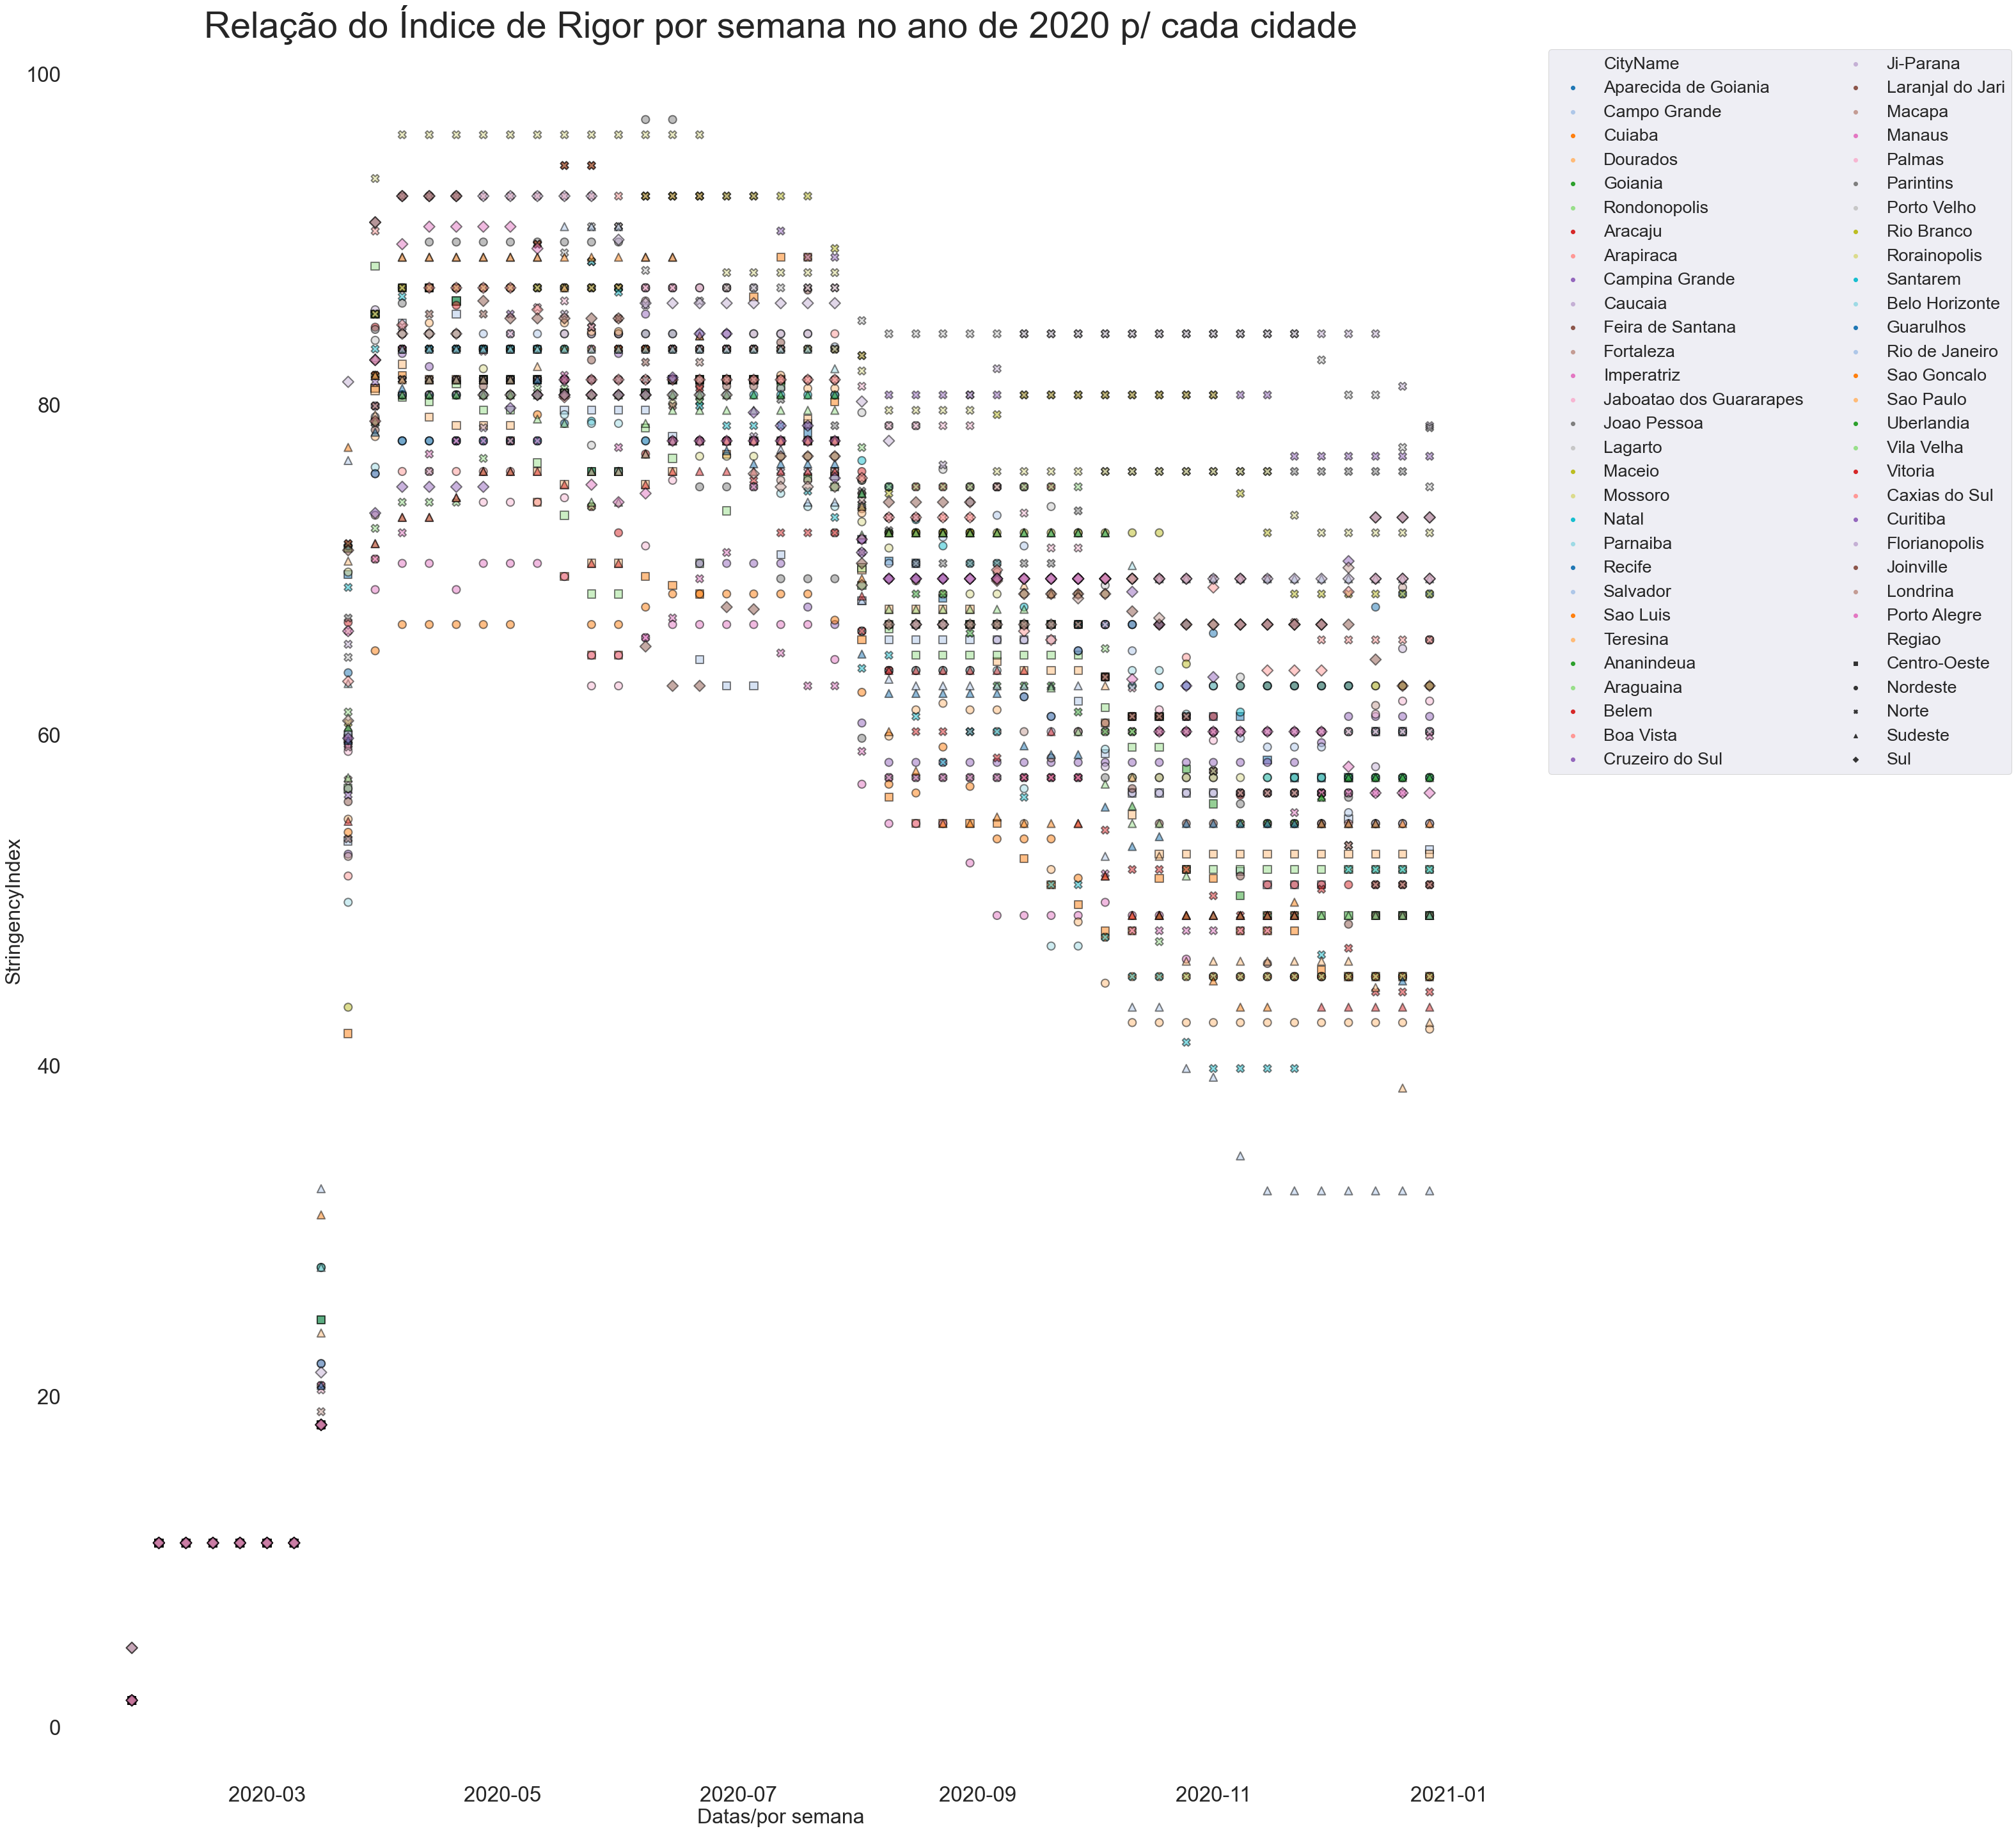

In [43]:
temp = df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2020]
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao','CityName'])

sns.set(rc={"figure.figsize":(40, 50)})
sns.set_theme(style="white")
sns.set(font_scale=3)

p = sns.scatterplot(data=temp, \
    x='Date', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=150, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

p.legend(loc='upper center', bbox_to_anchor=(1.2, 1), fontsize=27, ncol=2)
p.set_ylabel('StringencyIndex', fontsize=32)
p.set_xlabel('Datas/por semana', fontsize=32)
p.set_facecolor('white')
p.set_title('Relação do Índice de Rigor por semana no ano de 2020 p/ cada cidade', fontsize=57)



In [44]:
df_tot_sem.loc[df_tot_sem['CityName'] == 'Cuiaba']

CityName       Date  C1_School closing  C1_Flag  C2_Workplace closing  \
14     Cuiaba 2020-01-05                0.0      NaN                   0.0   
68     Cuiaba 2020-01-12                0.0      NaN                   0.0   
122    Cuiaba 2020-01-19                0.0      NaN                   0.0   
176    Cuiaba 2020-01-26                0.0      NaN                   0.0   
230    Cuiaba 2020-02-02                0.0      NaN                   0.0   
...       ...        ...                ...      ...                   ...   
6062   Cuiaba 2022-02-27                1.0      1.0                   1.0   
6116   Cuiaba 2022-03-06                1.0      1.0                   1.0   
6170   Cuiaba 2022-03-13                NaN      NaN                   NaN   
6224   Cuiaba 2022-03-20                NaN      NaN                   NaN   
6278   Cuiaba 2022-03-27                NaN      NaN                   NaN   

      C2_Flag  C3_Cancel public events  C3_Flag  \
14        NaN                      0.0      NaN   
68        NaN                      0.0      NaN   
122       NaN                      0.0      NaN   
176       NaN                      0.0      NaN   
230       NaN                      0.0      NaN   
...       ...                      ...      ...   
6062      1.0                      1.0      1.0   
6116      1.0                      1.0      1.0   
6170      NaN                      NaN      NaN   
6224      NaN                      NaN      NaN   
6278      NaN                      NaN      NaN   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
14                              0.0      NaN                        0.0   
68                              0.0      NaN                        0.0   
122                             0.0      NaN                        0.0   
176                             0.0      NaN                        0.0   
230                             0.0      NaN                        0.0   
...                             ...      ...                        ...   
6062                            0.0      NaN                        0.0   
6116                            0.0      NaN                        0.0   
6170                            NaN      NaN                        NaN   
6224                            NaN      NaN                        NaN   
6278                            NaN      NaN                        NaN   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
14        NaN                           0.0      NaN   
68        NaN                           0.0      NaN   
122       NaN                           0.0      NaN   
176       NaN                           0.0      NaN   
230       NaN                           0.0      NaN   
...       ...                           ...      ...   
6062      NaN                           0.0      NaN   
6116      NaN                           0.0      NaN   
6170      NaN                           NaN      NaN   
6224      NaN                           NaN      NaN   
6278      NaN                           NaN      NaN   

      C7_Restrictions on internal movement  C7_Flag  \
14                                     0.0      NaN   
68                                     0.0      NaN   
122                                    0.0      NaN   
176                                    0.0      NaN   
230                                    0.0      NaN   
...                                    ...      ...   
6062                                   0.0      NaN   
6116                                   0.0      NaN   
6170                                   NaN      NaN   
6224                                   NaN      NaN   
6278                                   NaN      NaN   

      C8_International travel controls  E1_Income support  E1_Flag  \
14                                 0.0                0.0      NaN   
68                                 0.0                0.0      NaN   
122       

Text(0.5, 1.0, 'Relação do Índice de Rigor por semana no ano de 2021 p/ cada cidade')

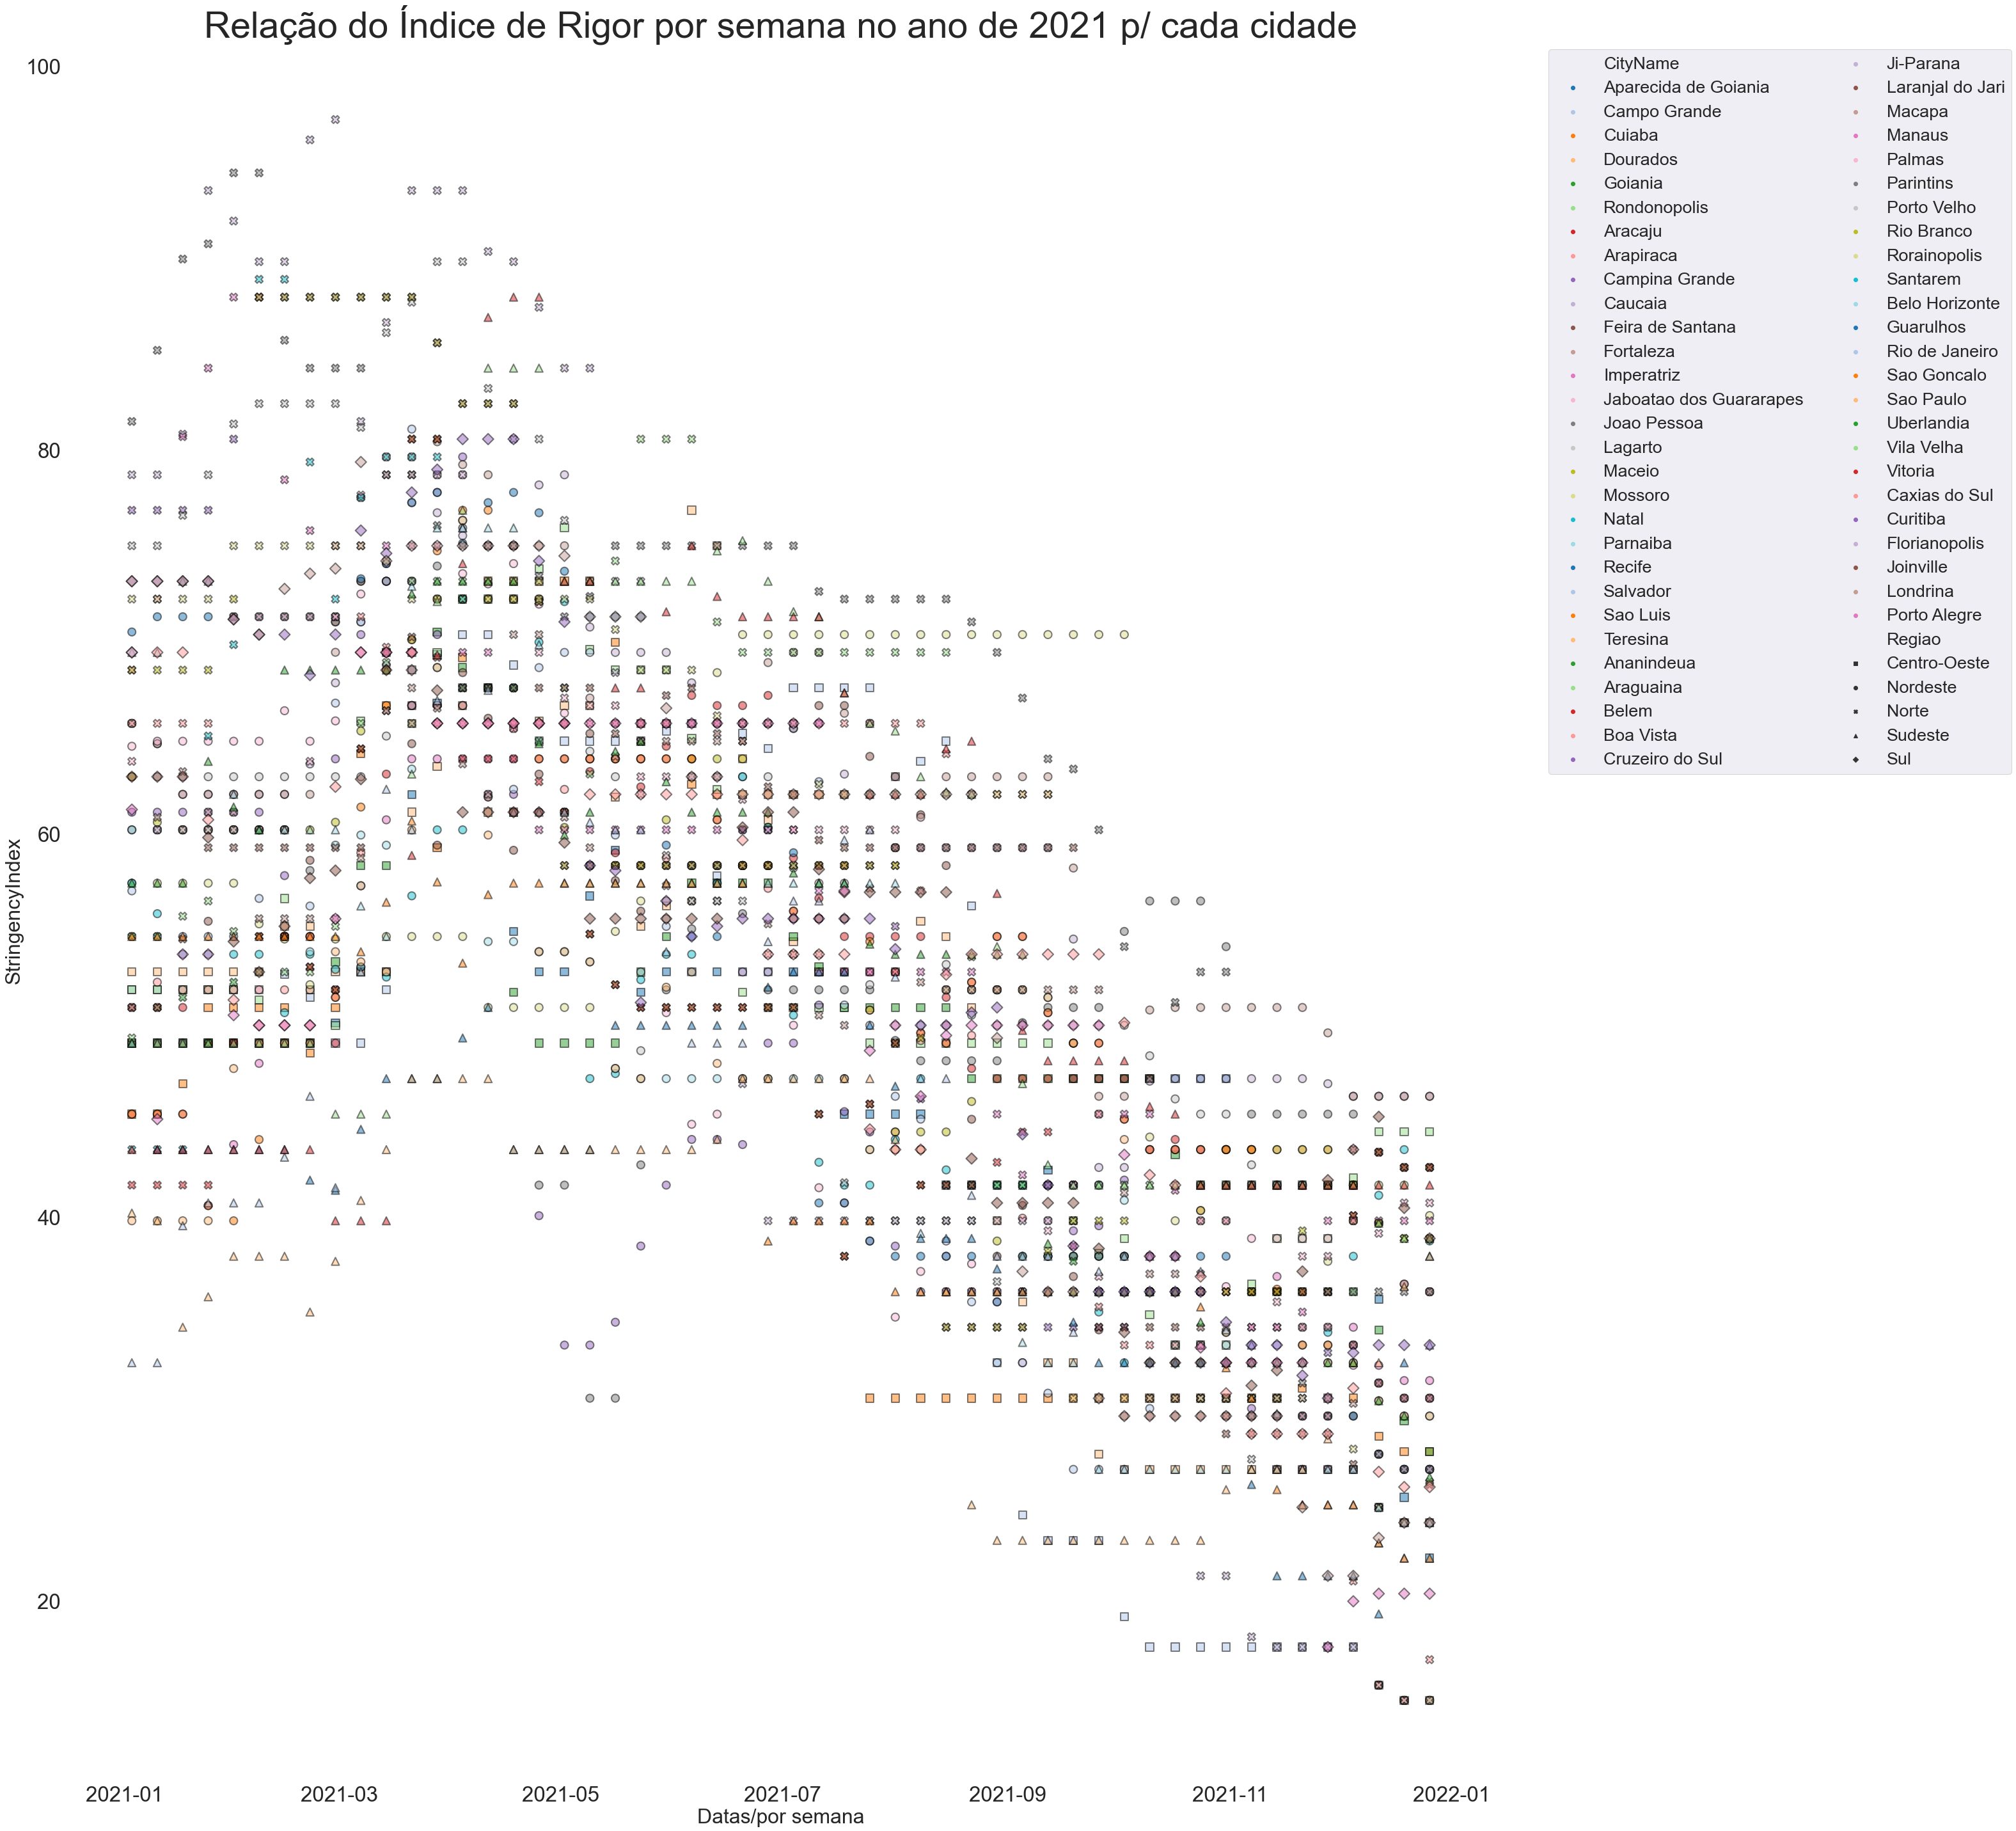

In [45]:
#Ta sem 3 cidades pq estão com indicadores nulos
temp = df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021]
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao','CityName'])

sns.set(rc={"figure.figsize":(40, 50)})
sns.set_theme(style="white")
sns.set(font_scale=3)

p = sns.scatterplot(data=temp, \
    x='Date', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=150, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

p.legend(loc='upper center', bbox_to_anchor=(1.2, 1), fontsize=27, ncol=2)
p.set_ylabel('StringencyIndex', fontsize=32)
p.set_xlabel('Datas/por semana', fontsize=32)
p.set_facecolor('white')
p.set_title('Relação do Índice de Rigor por semana no ano de 2021 p/ cada cidade', fontsize=57)

In [46]:
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2020])))
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021])))
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2022])))

df_tot_sem#.loc[df_tot['Date'].dt.year == 2021]
        
#df_tot.loc[df_tot['SemanaEpidemiologica'] == 1]

2808
2808
702


CityName       Date  C1_School closing  C1_Flag  \
0               Ananindeua 2020-01-05                0.0      NaN   
1     Aparecida de Goiania 2020-01-05                0.0      NaN   
2                  Aracaju 2020-01-05                0.0      NaN   
3                Araguaina 2020-01-05                0.0      NaN   
4                Arapiraca 2020-01-05                0.0      NaN   
...                    ...        ...                ...      ...   
6313             Sao Paulo 2022-03-27                NaN      NaN   
6314              Teresina 2022-03-27                NaN      NaN   
6315            Uberlandia 2022-03-27                NaN      NaN   
6316            Vila Velha 2022-03-27                NaN      NaN   
6317               Vitoria 2022-03-27                NaN      NaN   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                      0.0      NaN                      0.0      NaN   
1                      0.0      NaN                      0.0      NaN   
2                      0.0      NaN                      0.0      NaN   
3                      0.0      NaN                      0.0      NaN   
4                      0.0      NaN                      0.0      NaN   
...                    ...      ...                      ...      ...   
6313                   NaN      NaN                      NaN      NaN   
6314                   NaN      NaN                      NaN      NaN   
6315                   NaN      NaN                      NaN      NaN   
6316                   NaN      NaN                      NaN      NaN   
6317                   NaN      NaN                      NaN      NaN   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                               0.0      NaN                        0.0   
1                               0.0      NaN                        0.0   
2                               0.0      NaN                        0.0   
3                               0.0      NaN                        0.0   
4                               0.0      NaN                        0.0   
...                             ...      ...                        ...   
6313                            NaN      NaN                        NaN   
6314                            NaN      NaN                        NaN   
6315                            NaN      NaN                        NaN   
6316                            NaN      NaN                        NaN   
6317                            NaN      NaN                        NaN   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
0         NaN                           0.0      NaN   
1         NaN                           0.0      NaN   
2         NaN                           0.0      NaN   
3         NaN                           0.0      NaN   
4         NaN                           0.0      NaN   
...       ...                           ...      ...   
6313      NaN                           NaN      NaN   
6314      NaN                           NaN      NaN   
6315      NaN                           NaN      NaN   
6316      NaN                           NaN      NaN   
6317      NaN                           NaN      NaN   

      C7_Restrictions on internal movement  C7_Flag  \
0                                      0.0      NaN   
1                                      0.0      NaN   
2                                      0.0      NaN   
3                                      0.0      NaN   
4                                      0.0      NaN   
...                                    ...      ...   
6313                                   NaN      NaN   
6314                                   NaN      NaN   
6315                                   NaN      NaN   
6316                                   NaN      NaN   
6317                                   NaN      NaN   

      C8_International travel controls  E1_Income support  E1_Flag  \
0      

# Correlações

# 2020

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_2020 = df_tot_ano.loc[df_tot_ano['Date'] == '2020']
corr_2020 = corr_2020[['Morte ponderada por 100 mil','C1_School closing','C2_Workplace closing', 'C3_Cancel public events',\
       'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', \
       'C7_Restrictions on internal movement','C8_International travel controls', 'E1_Income support',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',\
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'H7_Vaccination policy', \
       'H8_Protection of elderly people', 'V1_Vaccine Prioritisation', 'V2_Vaccine Availability', 'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex', 'Regiao']]

corr_2020 = corr_2020.replace([-1], np.nan)

corr_2020 = corr_2020.corr().dropna(axis=0, how='all')
corr_2020 = corr_2020.dropna(axis=1, how='all')
corr_2020.head()

Morte ponderada por 100 mil  C1_School closing  \
Morte ponderada por 100 mil                       1.000000          -0.238509   
C1_School closing                                -0.238509           1.000000   
C2_Workplace closing                             -0.094739           0.166116   
C3_Cancel public events                          -0.285462          -0.002362   
C4_Restrictions on gatherings                    -0.102597           0.242353   

                               C2_Workplace closing  C3_Cancel public events  \
Morte ponderada por 100 mil               -0.094739                -0.285462   
C1_School closing                          0.166116                -0.002362   
C2_Workplace closing                       1.000000                 0.159710   
C3_Cancel public events                    0.159710                 1.000000   
C4_Restrictions on gatherings              0.291869                 0.414386   

                               C4_Restrictions on gatherings  \
Morte ponderada por 100 mil                        -0.102597   
C1_School closing                                   0.242353   
C2_Workplace closing                                0.291869   
C3_Cancel public events                             0.414386   
C4_Restrictions on gatherings                       1.000000   

                               C5_Close public transport  \
Morte ponderada por 100 mil                    -0.293542   
C1_School closing                               0.258150   
C2_Workplace closing                            0.050083   
C3_Cancel public events                        -0.203596   
C4_Restrictions on gatherings                  -0.011773   

                               C6_Stay at home requirements  \
Morte ponderada por 100 mil                       -0.178818   
C1_School closing                                  0.039154   
C2_Workplace closing                              -0.284229   
C3_Cancel public events                            0.196741   
C4_Restrictions on gatherings                      0.136825   

                               C7_Restrictions on internal movement  \
Morte ponderada por 100 mil                               -0.247056   
C1_School closing                                          0.406524   
C2_Workplace closing                                       0.102550   
C3_Cancel public events                                    0.105378   
C4_Restrictions on gatherings                              0.235337   

                               C8_International travel controls  \
Morte ponderada por 100 mil                           -0.018360   
C1_School closing                                      0.080840   
C2_Workplace closing                                   0.163846   
C3_Cancel public events                                0.172206   
C4_Restrictions on gatherings                          0.096188   

                               E1_Income support  E2_Debt/contract relief  \
Morte ponderada por 100 mil             0.180185                 0.039009   
C1_School closing                      -0.049825                 0.201167   
C2_Workplace closing                    0.202864                 0.175631   
C3_Cancel public events                -0.001133                 0.147706   
C4_Restrictions on gatherings           0.133315                 0.088959   

                               H1_Public information campaigns  \
Morte ponderada por 100 mil                          -0.164276   
C1_School closing                                     0.034056   
C2_Workplace closing                                  0.026797   
C3_Cancel public events                               0.373377   
C4_Restrictions on gatherings                         0.050023   

                               H2_Testing policy  H3_Contact tracing  \
Morte ponderada por 100 mil             0.121841           -0.131518   
C1_School closing                       0.103551           -0.131197   
C2_Workplace closing            

C:\Users\edupo\AppData\Local\Temp\ipykernel_21724\3536765585.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_2020, dtype=np.bool))


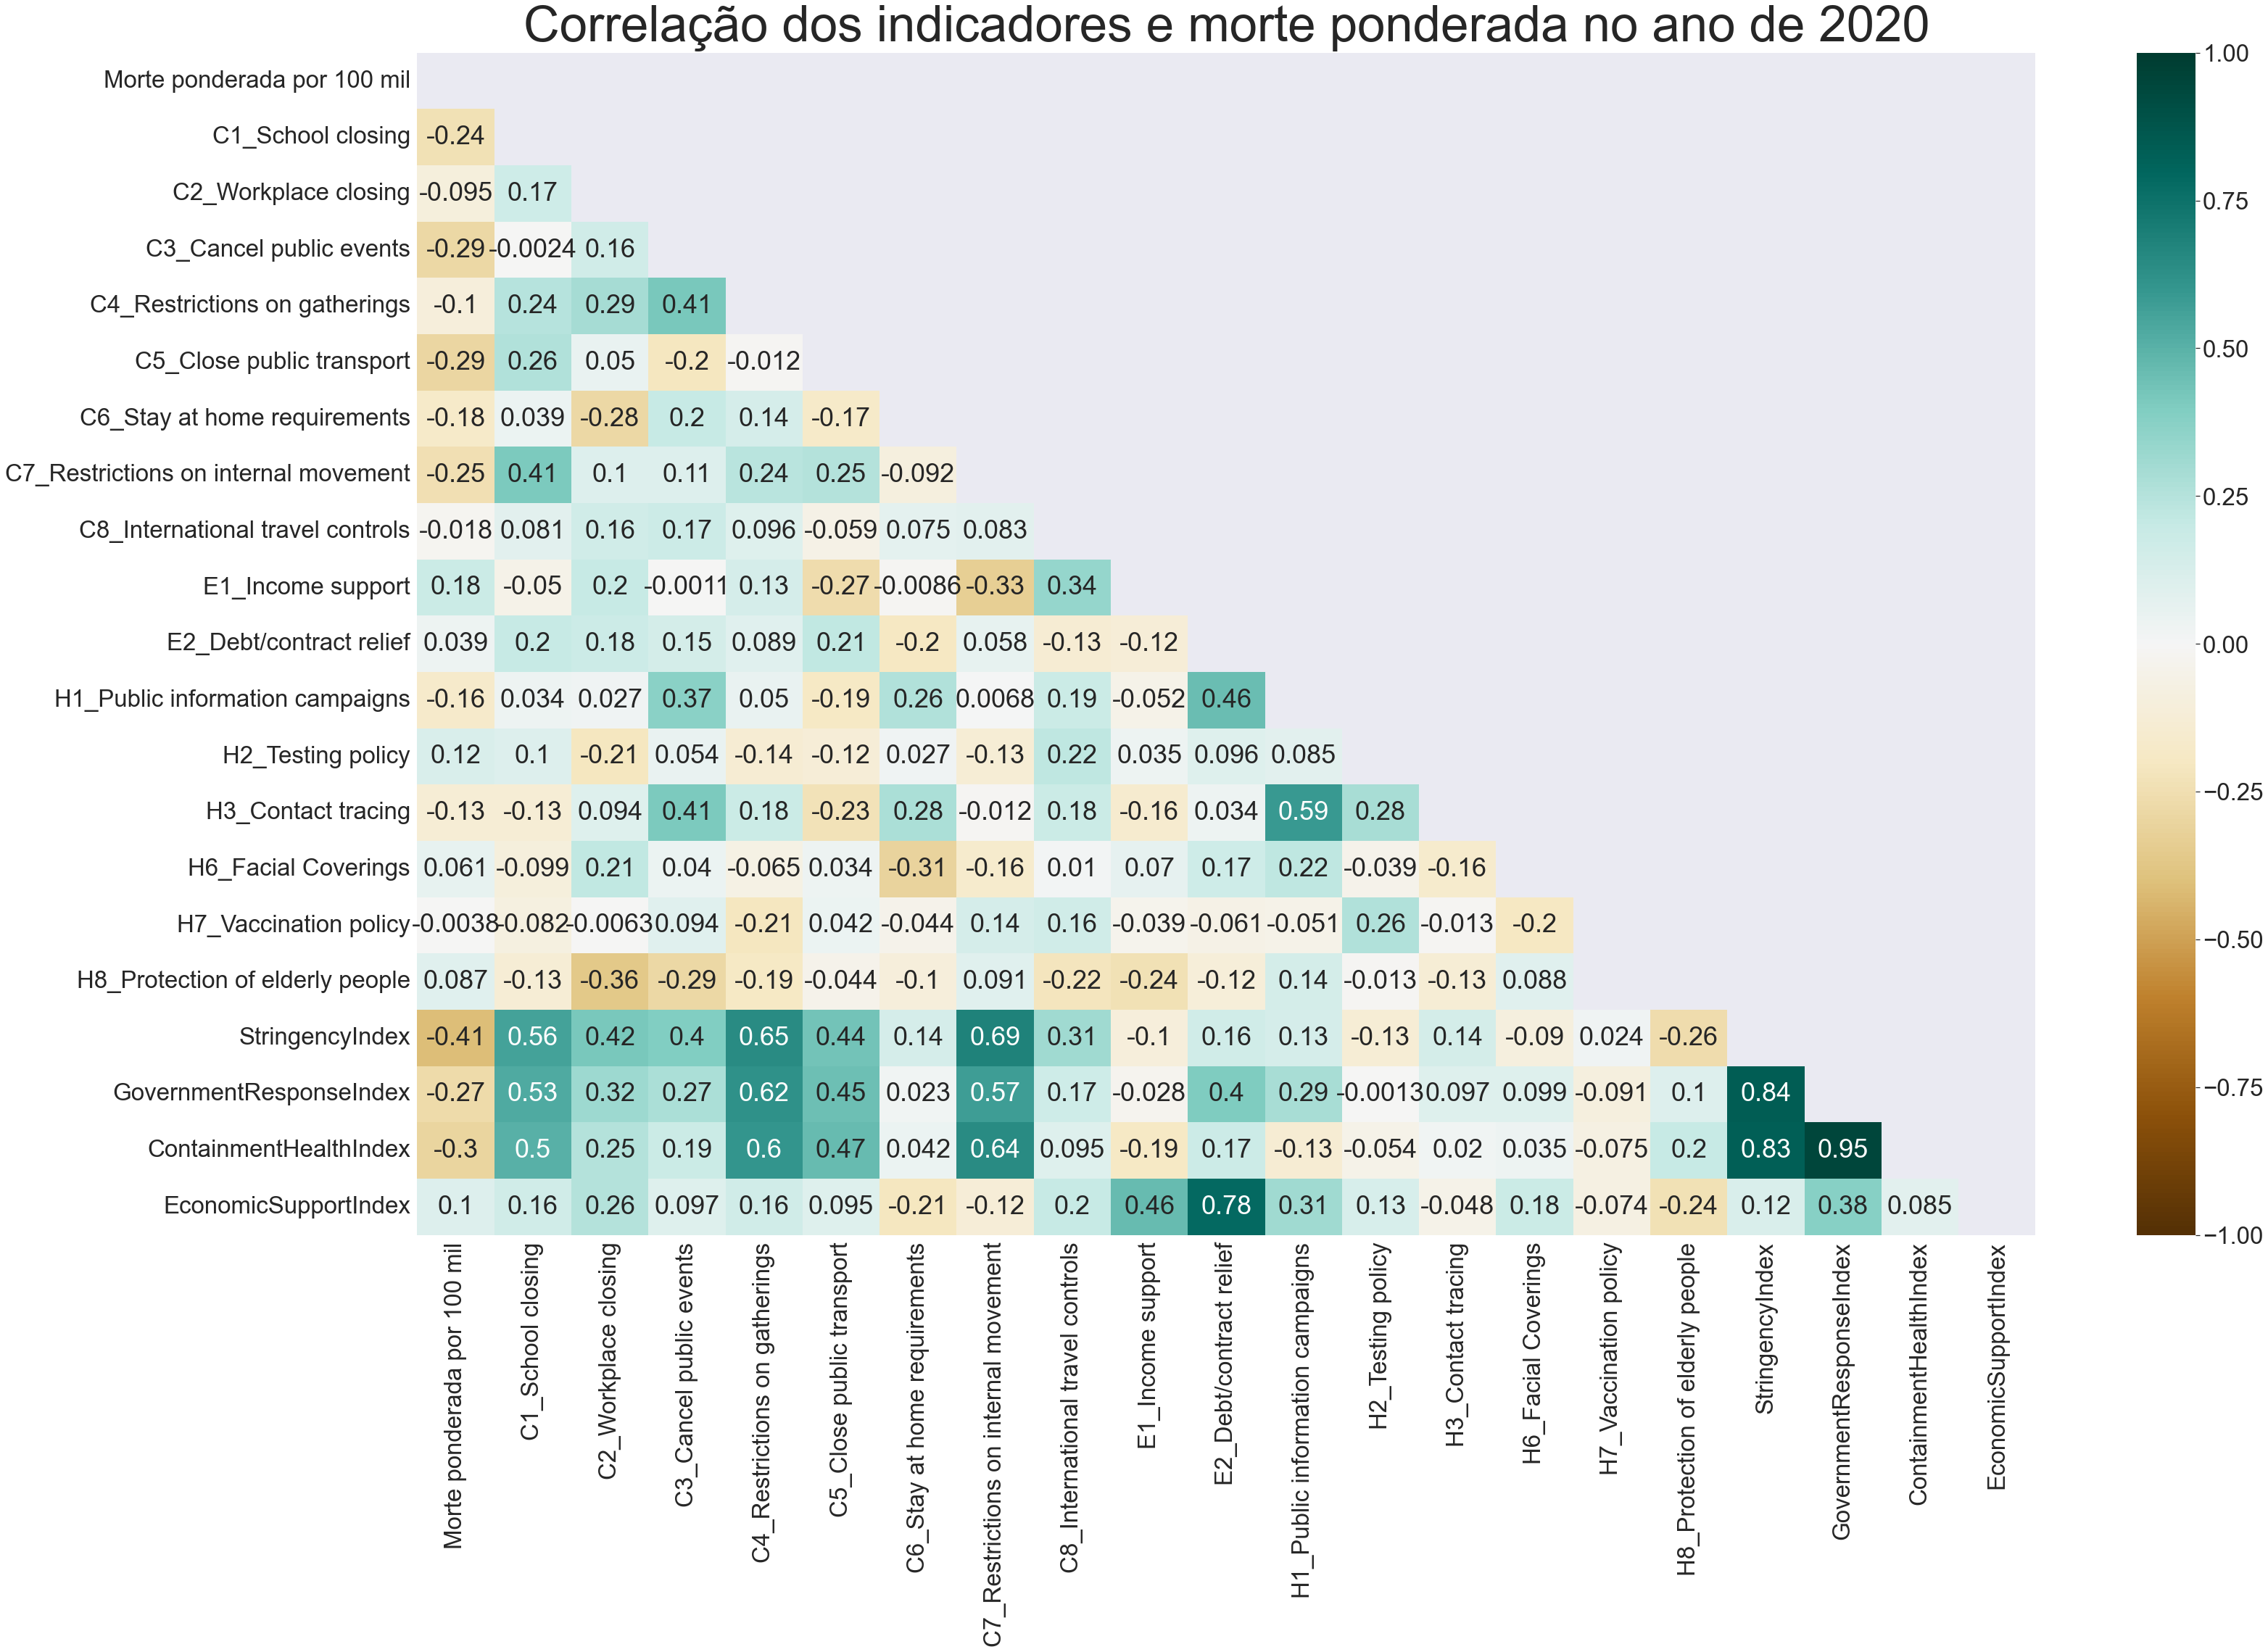

In [48]:
plt.figure(figsize=(50, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_2020, dtype=np.bool))
heatmap = sns.heatmap(corr_2020, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos indicadores e morte ponderada no ano de 2020', fontdict={'fontsize':69}, pad=16);

# 2021

In [49]:
corr_2021 = df_tot_ano.loc[df_tot_ano['Date'] == '2021']
corr_2021 = corr_2021[['Morte ponderada por 100 mil','C1_School closing','C2_Workplace closing', 'C3_Cancel public events',\
       'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', \
       'C7_Restrictions on internal movement','C8_International travel controls', 'E1_Income support',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',\
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'H7_Vaccination policy', \
       'H8_Protection of elderly people', 'V1_Vaccine Prioritisation', 'V2_Vaccine Availability', 'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex', 'Regiao']]

corr_2021 = corr_2021.replace([-1], np.nan)

corr_2021 = corr_2021.corr().dropna(axis=0, how='all')
corr_2021 = corr_2021.dropna(axis=1, how='all')
corr_2021.head()

Morte ponderada por 100 mil  C1_School closing  \
Morte ponderada por 100 mil                       1.000000          -0.226848   
C1_School closing                                -0.226848           1.000000   
C2_Workplace closing                             -0.156048           0.177385   
C3_Cancel public events                          -0.175358          -0.214432   
C4_Restrictions on gatherings                     0.037192          -0.160583   

                               C2_Workplace closing  C3_Cancel public events  \
Morte ponderada por 100 mil               -0.156048                -0.175358   
C1_School closing                          0.177385                -0.214432   
C2_Workplace closing                       1.000000                 0.346970   
C3_Cancel public events                    0.346970                 1.000000   
C4_Restrictions on gatherings              0.230783                 0.281350   

                               C4_Restrictions on gatherings  \
Morte ponderada por 100 mil                         0.037192   
C1_School closing                                  -0.160583   
C2_Workplace closing                                0.230783   
C3_Cancel public events                             0.281350   
C4_Restrictions on gatherings                       1.000000   

                               C5_Close public transport  \
Morte ponderada por 100 mil                     0.078295   
C1_School closing                               0.168825   
C2_Workplace closing                           -0.041293   
C3_Cancel public events                        -0.128751   
C4_Restrictions on gatherings                   0.197333   

                               C6_Stay at home requirements  \
Morte ponderada por 100 mil                        0.203373   
C1_School closing                                  0.237148   
C2_Workplace closing                               0.455262   
C3_Cancel public events                            0.227816   
C4_Restrictions on gatherings                     -0.049447   

                               C7_Restrictions on internal movement  \
Morte ponderada por 100 mil                               -0.063204   
C1_School closing                                          0.227701   
C2_Workplace closing                                       0.103594   
C3_Cancel public events                                    0.026497   
C4_Restrictions on gatherings                              0.176961   

                               C8_International travel controls  \
Morte ponderada por 100 mil                            0.153747   
C1_School closing                                     -0.059456   
C2_Workplace closing                                  -0.105458   
C3_Cancel public events                                0.110285   
C4_Restrictions on gatherings                          0.138388   

                               E1_Income support  E2_Debt/contract relief  \
Morte ponderada por 100 mil             0.031792                 0.300009   
C1_School closing                      -0.064984                 0.018041   
C2_Workplace closing                    0.234527                 0.091472   
C3_Cancel public events                 0.146271                -0.068744   
C4_Restrictions on gatherings           0.246491                 0.109545   

                               E3_Fiscal measures  H2_Testing policy  \
Morte ponderada por 100 mil             -0.015489           0.133656   
C1_School closing                       -0.193414          -0.237051   
C2_Workplace closing                    -0.243282           0.172351   
C3_Cancel public events                  0.015427           0.127158   
C4_Restrictions on gatherings            0.283300          -0.167419   

                               H7_Vaccination policy  \
Morte ponderada por 100 mil                -0.014992   
C1_School closing                           0.365016   
C2_Workplace closing                        

C:\Users\edupo\AppData\Local\Temp\ipykernel_21724\676774567.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_2021, dtype=np.bool))


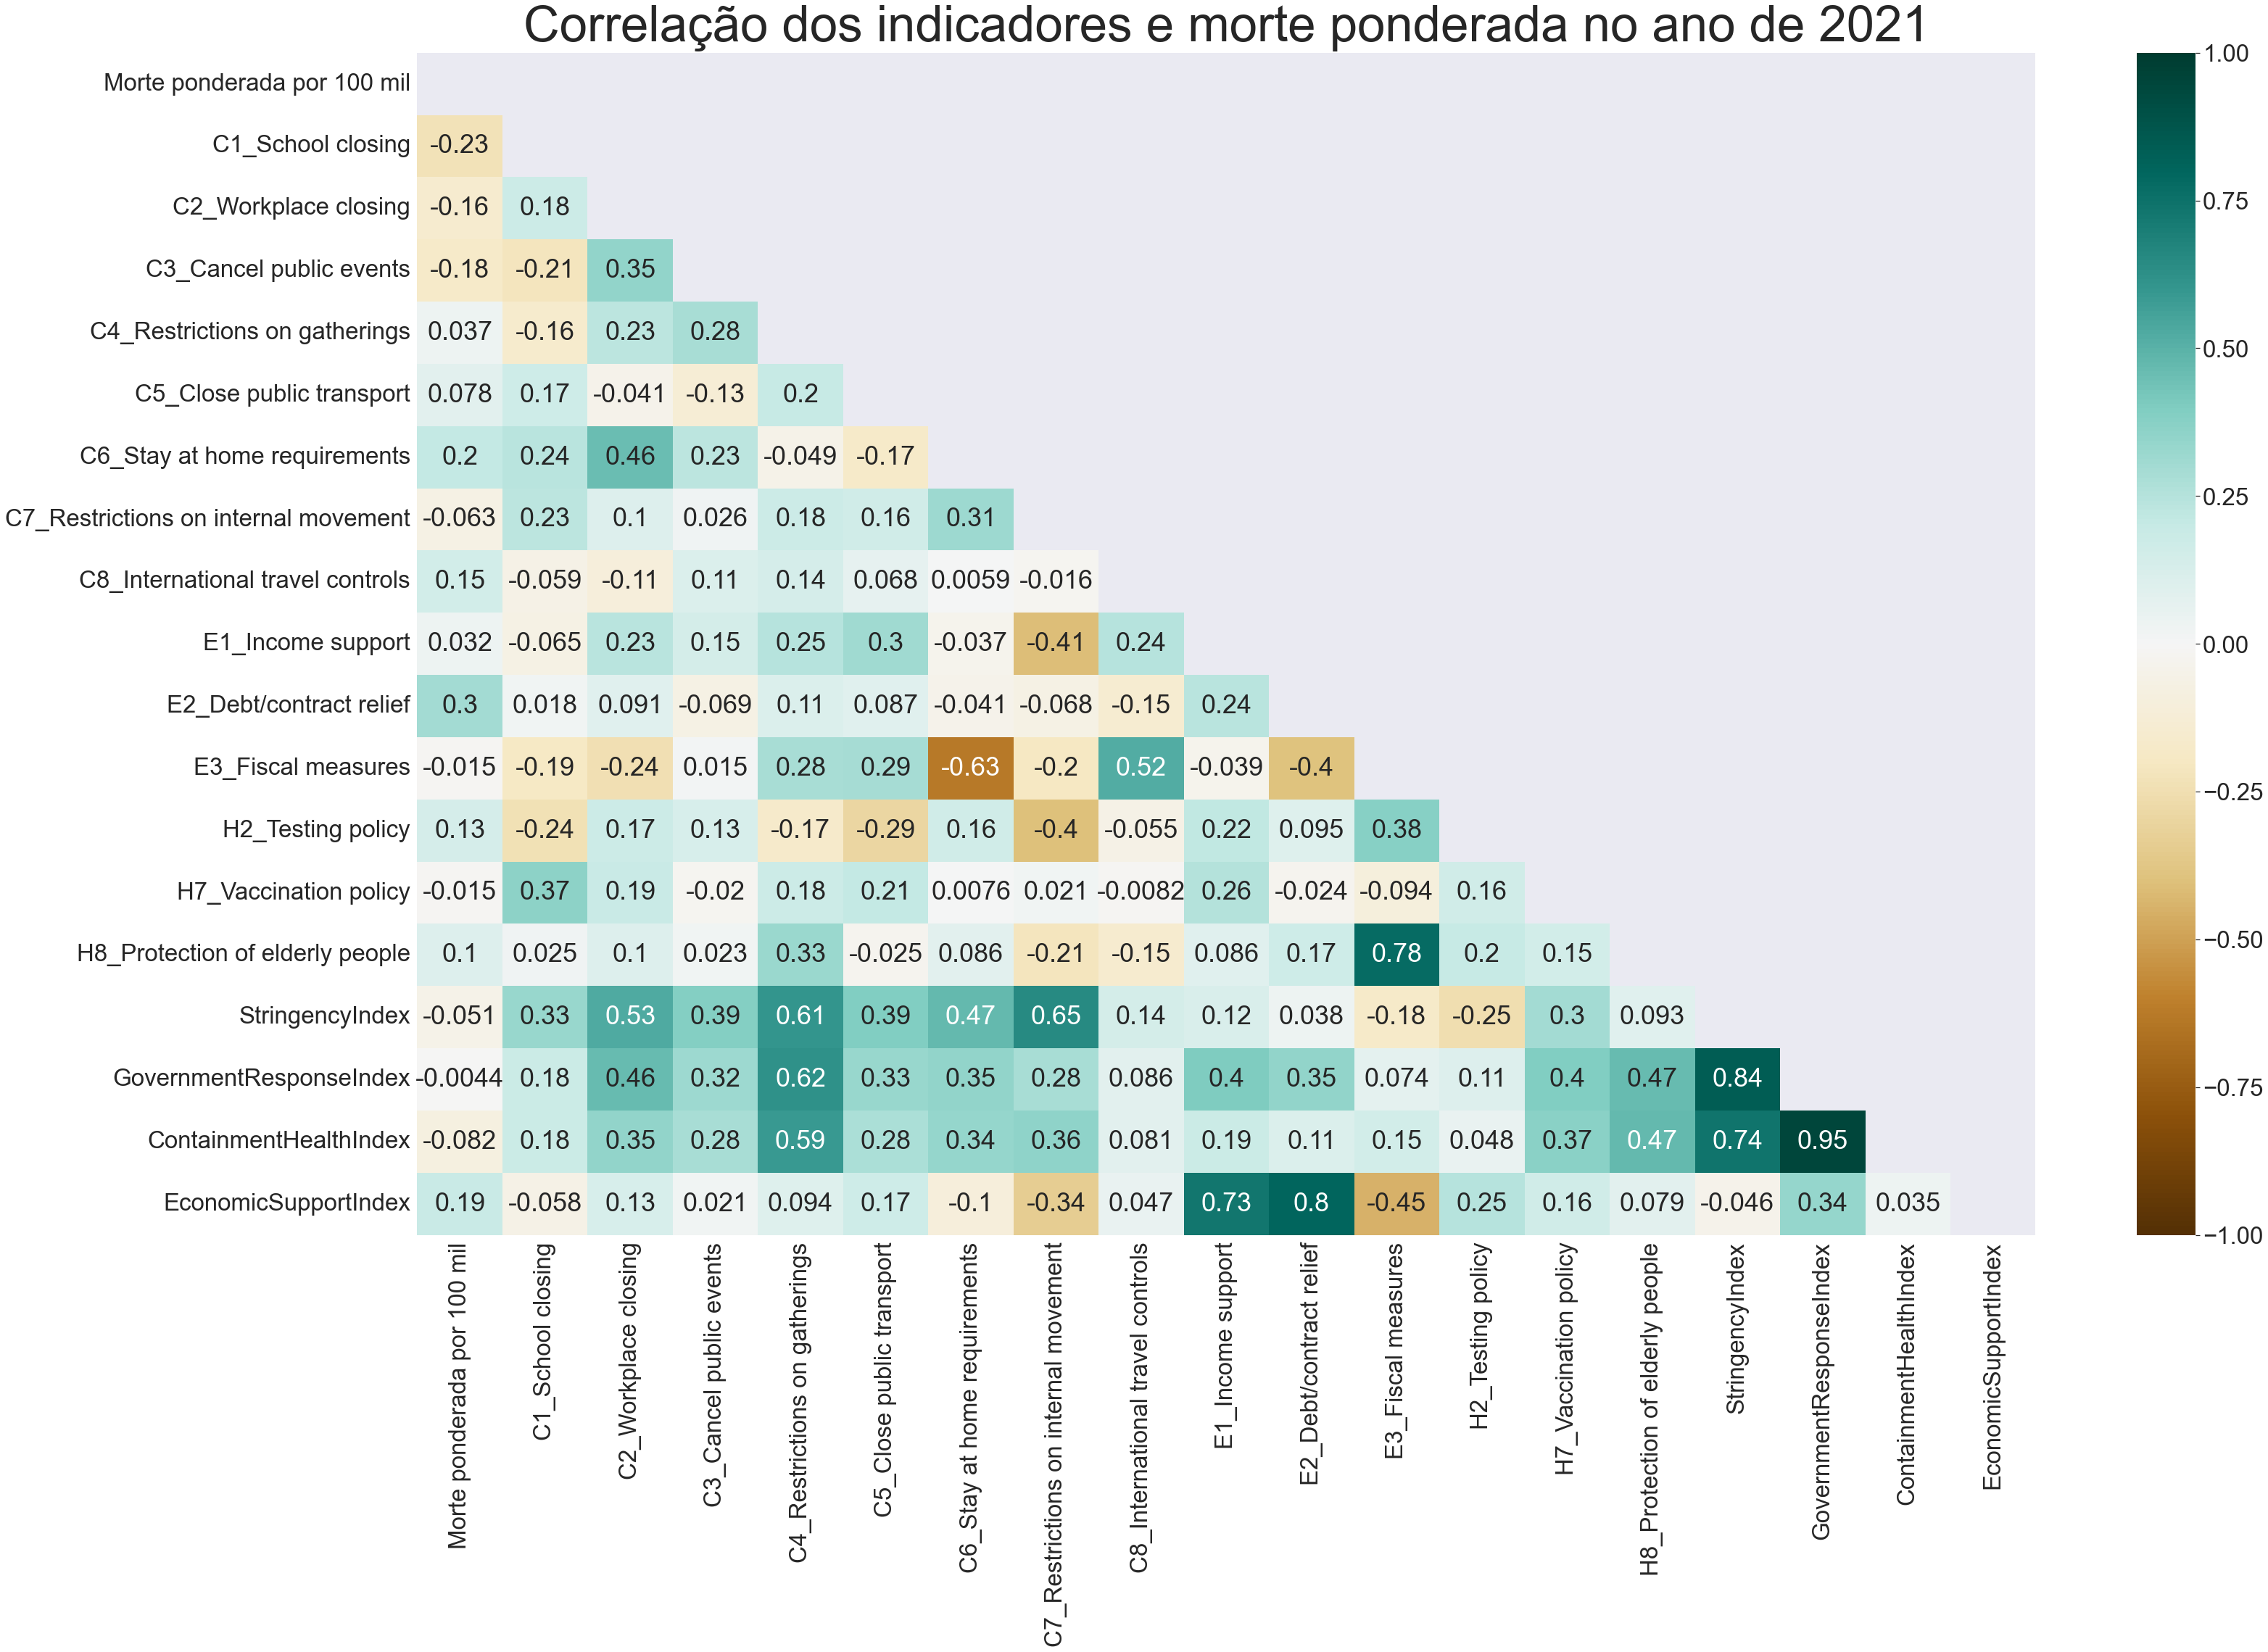

In [50]:
plt.figure(figsize=(50, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_2021, dtype=np.bool))
heatmap = sns.heatmap(corr_2021, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos indicadores e morte ponderada no ano de 2021', fontdict={'fontsize':69}, pad=16);

# difere

In [51]:
#Drop os indicadores que não serão utilizados
df = df.drop(columns=['C1_School closing', 'C1_Flag', 'C1_Notes', 'C2_Workplace closing', 'C2_Flag', 'C2_Notes', 'C3_Cancel public events', 'C3_Flag', 'C3_Notes', 'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes', 'C5_Close public transport', 'C5_Flag', 'C5_Notes', 'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes', 'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes', 'C8_International travel controls', 'C8_Notes', 'E1_Income support', 'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes', 'E3_Fiscal measures', 'E3_Notes', 'E4_International support', 'E4_Notes', 'M1_Wildcard', 'M1_Notes', 'V1_Vaccine Prioritisation', 'V1_Notes', 'V2_Vaccine Availability', 'V2_Notes', 'V3_Vaccine Financial Support', 'V3_Notes', 'V4_Mandatory Vaccination', 'V4_Notes'])

#drop todas linhas que tem todos os indicadores NaN
#df.dropna(axis=0, how='all', subset=['H1_Public information campaigns', 'H1_Flag', 'H1_Notes', \
#        'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes', 'H4_Emergency investment in healthcare', 'H4_Notes', 'H5_Investment in vaccines', 'H5_Notes', \
#        'H6_Facial Coverings', 'H6_Flag', 'H6_Notes', 'H7_Vaccination policy', 'H7_Flag', 'H7_Notes', 'H8_Protection of elderly people', 'H8_Flag', 'H8_Notes'], inplace=True)

#Drop colunas que não estão sendo utilizadas no momento
df = df.drop(columns=['CountryName', 'CountryCode', 'RegionCode', 'CityCode'])

KeyError: "['C1_Notes', 'C2_Notes', 'C3_Notes', 'C4_Notes', 'C5_Notes', 'C6_Notes', 'C7_Notes', 'C8_Notes', 'E1_Notes', 'E2_Notes', 'E3_Notes', 'E4_Notes', 'M1_Wildcard', 'M1_Notes', 'V1_Notes', 'V2_Notes', 'V3_Notes', 'V4_Notes'] not found in axis"

In [ ]:
#Retira as entradas referentes ao Governo Federal e aos Estados
df.dropna(axis=0, how='any', subset=['CityName'], inplace=True)

In [ ]:
#Remoção dos 'NaN' em 'RegionName' e 'CityName' para aprimorar a separação por cidades futuramente
#Toda Entry que está com NaN em 'RegionName' diz respeito ao governo
#df.RegionName = df.RegionName.fillna('Governo Federal')

#Toda Entry que está com NaN em 'CityName' diz respeito ao estado ou ao governo federal
#df.CityName = df.CityName.fillna(df.RegionName)

df

In [ ]:
df_h6 = df[['CityName', 'Jurisdiction', 'Date', 'H6_Facial Coverings', 'H6_Flag', 'H6_Notes']]

In [ ]:
#H: Health system policies

df_h1 = df.dropna(axis=0, how='all', subset=['H1_Public information campaigns', 'H1_Flag', 'H1_Notes'])
df_h2 = df.dropna(axis=0, how='all', subset=['H2_Testing policy', 'H2_Notes'])
df_h3 = df.dropna(axis=0, how='all', subset=['H3_Contact tracing', 'H3_Notes'])
df_h4 = df.dropna(axis=0, how='all', subset=['H4_Emergency investment in healthcare', 'H4_Notes'])
df_h5 = df.dropna(axis=0, how='all', subset=['H5_Investment in vaccines', 'H5_Notes'])
df_h6 = df.dropna(axis=0, how='all', subset=['H6_Facial Coverings', 'H6_Flag', 'H6_Notes'])
df_h7 = df.dropna(axis=0, how='all', subset=['H7_Vaccination policy', 'H7_Flag', 'H7_Notes'])
df_h8 = df.dropna(axis=0, how='all', subset=['H8_Protection of elderly people', 'H8_Flag', 'H8_Notes'])

print("H's len: " + str(len(df_h1)) + ' | ' + str(len(df_h2)) + ' | ' + str(len(df_h3)) + ' | ' + str(len(df_h4)) + \
    ' | ' + str(len(df_h5)) + ' | ' + str(len(df_h6)) + ' | ' + str(len(df_h7)) + ' | ' + str(len(df_h8)))


In [ ]:
#Release Memory
#del [[df_h1,df_h2,df_h3,df_h4,df_h5,df_h6,df_h7,df_h8]]
del [[df_h1,df_h2,df_h3,df_h4,df_h5,df_h7,df_h8]]
gc.collect()

In [ ]:
#H6_Facial Coverings: Record policies on the use of facial coverings outside the home
#H6_Flag: 0 - targeted, 1 - general, Blank - no data
import seaborn as sns

df_h6

In [ ]:
#Drop colunas que não serão utilizadas nesta análise
df_h6 = df_h6.drop(columns=['RegionName', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes', \
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes', \
       'H4_Emergency investment in healthcare', 'H4_Notes', \
       'H5_Investment in vaccines', 'H5_Notes','H7_Vaccination policy', 'H7_Flag', 'H7_Notes', \
       'H8_Protection of elderly people', 'H8_Flag', 'H8_Notes', \
       'StringencyIndex', 'StringencyIndexForDisplay', \
       'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay', \
       'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', \
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', \
       'EconomicSupportIndex', 'EconomicSupportIndexForDisplay'])

In [ ]:
#Remove City_TOTAL que sempre é nulo, e city_wide q é sempre igual a city_gov
#df_h6 = df_h6[df_h6.Jurisdiction != 'CITY_TOTAL']
#df_h6 = df_h6[df_h6.Jurisdiction != 'CITY_WIDE']
df_h6 = df_h6[df_h6.Jurisdiction.isin(['CITY_TOTAL', 'CITY_WIDE']) == False]

In [ ]:
#dropa coluna jurisdiction pq n vai usar mais
df_h6 = df_h6.drop(columns=['Jurisdiction'])

In [ ]:
#Converte coluna Date de INT para DATETIME
df_h6['Date'] = pd.to_datetime(df_h6['Date'], format='%Y%m%d')

In [ ]:
df_h6.info()

In [ ]:
df_h6 = df_h6.sort_values(by=['Date', 'CityName'])

#Como os NaN são dados interessantes, da replace neles por -1 para identificá-los
df_h6['H6_Facial Coverings'] = df_h6['H6_Facial Coverings'].fillna(-1)

df_h6.head(-1000)

In [ ]:
df_h6.loc[df_h6['Date'].dt.year == 2021]

In [ ]:
#df_h6[(df_h6['Date'] == 20220308) & (df_h6['Jurisdiction'].astype('str') == 'CITY_TOTAL')]
print(str(len(df_h6[df_h6['Date'] == '2022-03-08'])))
df_h6[df_h6['Date'] == '2022-03-08']




In [ ]:
#Separa o dataset em trimestres
trimestres = [part for _, part in df_h6.groupby(pd.Grouper(key='Date',freq='QS'))]

print(str(len(trimestres)))
#trimestres[0][trimestres[0]['CityName'] == 'Dourados']
trimestres[0]

In [ ]:
#Determina qual o Trimestre que esse grupo representa
trimestres[0]['Date'].dt.to_period('Q').reset_index()['Date']

In [ ]:
#Pega o valor mais comum (moda) do indicador 'H6' para cada cidade em um dado trimestre
#trimestres[1].groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).to_frame()
trimestres[8].groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).reset_index()

In [ ]:
new_df = []

for tri in trimestres:
    #Pega o valor mais comum (moda) do indicador 'H6' para cada cidade em um dado trimestre
    #data_m = tri.groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).reset_index()
    #A de cima se tiver mais de uma moda retorna uma lista, essa de baixo garante que só virá um valor
    data_m = tri.groupby(['CityName'])['H6_Facial Coverings'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
    data_m

    data_m['Period'] = tri['Date'].dt.to_period('Q').reset_index()['Date']

    new_df.append(data_m)

a = 0

aux = pd.concat(new_df)



#asd = pd.DataFrame(data=new_df, columns=['a','b','c'])
aux.head(-26)

In [ ]:
#H6_Facial Coverings
aux2 = aux.groupby(['Period','H6_Facial Coverings'])['CityName'].count().reset_index()
aux2

In [ ]:
aux2['H6_Facial Coverings'] = aux2['H6_Facial Coverings'].astype('int')
aux2.info()

In [ ]:
sns.catplot(data=aux2, x='Period', y='CityName', hue='H6_Facial Coverings', kind='bar', height=7, aspect=2, palette='turbo')

In [ ]:
plot = sns.catplot(data=aux2, x='Period', y='CityName', hue='H6_Facial Coverings', kind='bar', height=7, aspect=1.3, palette='coolwarm')
plot.set(title='Nível de Restrição do uso de máscaras', ylabel='Cities Count')
plot

#pra saber o período que cada Quarter representa
#https://whatthequarter.com/

In [ ]:
aux2.describe()

In [ ]:
df_h6[df_h6['Date'] == '2022-03-08']


#create unique list of Cities and States
unique = df_h6[df_h6['Date'] == '2022-03-31'].CityName.unique()
print(str(len(unique)))
unique


In [ ]:
a = df_h6.isna().any()

a.values

In [ ]:
#sns.catplot(data=df_h6, y=)
#3 em 3 meses
#groupby politica h6 e contar nº ocorrencias
x = pd.DataFrame(df_h6.loc[:,['Date', 'H6_Facial Coverings']].groupby(['Date', 'H6_Facial Coverings']).value_counts().reset_index())
x.head(-1000)

In [ ]:
#20200101
df_h6[df_h6['Date'] == 20200101]

In [ ]:
#create unique list of Cities and States
UniqueStatesCities = df_h6.CityName.unique()

#create a data frame dictionary to store your data frames
states_cities = {elem : pd.DataFrame for elem in UniqueStatesCities}

for key in states_cities.keys():
    states_cities[key] = df_h6[:][df_h6.CityName == key]
    states_cities[key].sort_values(by='Date', na_position='first', inplace=True)

print(len(UniqueStatesCities))

#54 cidades + Governo Federal + 26 estados + Distrito Federal
UniqueStatesCities

#Algumas cidades não estão na lista, pois tinham todos os indicadores nulos. São elas:
# Santaem, (mais uma possivelmente, não achei)

In [ ]:
#states_cities['Brasilia'].info()

In [ ]:
states_cities['Brasilia']

In [ ]:
#Pega um set(list mas unique) das notes de H6
set(states_cities['Brasilia'][states_cities['Brasilia']['H6_Notes'].notna()]['H6_Notes'].to_list())